In [2023]:
##Data Exploration
##import the Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
##Load data set
df=pd.read_csv(r"C:\Users\91878\Downloads\mobile_data.csv")

In [2024]:
##show the data set
df

Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
0             0        Infinix SMART 7     Night Black      64    4      6000   
1             1        Infinix SMART 7      Azure Blue      64    4      6000   
2             2           MOTOROLA G32    Mineral Gray     128    8      5000   
3             3               POCO C50      Royal Blue      32    2      5000   
4             4        Infinix HOT 30i        Marigold     128    8      5000   
..          ...                    ...             ...     ...  ...       ...   
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
0          13MP          5MP        1          16.76   
1          13MP          5MP        1          16.76   
2          50MP         16MP        0          16.64   
3           8MP          5MP        0          16.56   
4          50MP          5MP        1          16.76   
..          ...          ...      ...            ...   
536        50MP         12MP        0          15.49   
537         5MP          2MP        0          12.70   
538        50MP          8MP        0          16.76   
539        50MP         32MP        0          16.26   
540        50MP          8MP        0          16.66   

                      Processor_   Prize  
0     Unisoc Spreadtrum SC9863A1   7,299  
1     Unisoc Spreadtrum SC9863A1   7,299  
2        Qualcomm Snapdragon 680  11,999  
3             Mediatek Helio A22   5,649  
4                            G37   8,999  
..                           ...     ...  
536  Qualcomm Snapdragon 8 Gen 2  79,999  
537                    Octa Core   5,998  
538           MediaTek Helio G35   9,990  
539      Exynos 1380, Octa Core   38,999  
540           Mediatek Helio G35  15,999  

[541 rows x 12 columns]

In [2025]:
#Drop the unnececory columns 
df=df.drop('Unnamed: 0',axis=1)
print(df)

                     Model          Colour  Memory  RAM  Battery_ Rear Camera  \
0          Infinix SMART 7     Night Black      64    4      6000        13MP   
1          Infinix SMART 7      Azure Blue      64    4      6000        13MP   
2             MOTOROLA G32    Mineral Gray     128    8      5000        50MP   
3                 POCO C50      Royal Blue      32    2      5000         8MP   
4          Infinix HOT 30i        Marigold     128    8      5000        50MP   
..                     ...             ...     ...  ...       ...         ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8      3900        50MP   
537               LAVA Z21            Cyan      32    2      3100         5MP   
538         Tecno Spark 8T  Turquoise Cyan      64    4      5000        50MP   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000        50MP   
540               OPPO A77        Sky Blue     128    4      5000        50MP   

    Front Camera  AI Lens  

In [2026]:
#Check the information data sheet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery_       541 non-null    int64  
 5   Rear Camera    541 non-null    object 
 6   Front Camera   541 non-null    object 
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor_     541 non-null    object 
 10  Prize          541 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 46.6+ KB


In [2027]:
#drscribe the data set
df.describe()

Memory         RAM     Battery_     AI Lens  Mobile Height
count  541.000000  541.000000   541.000000  541.000000     541.000000
mean   110.550832    5.397412  4871.587800    0.062847      16.431201
std     60.600694    1.984923   780.148862    0.242911       2.523553
min     16.000000    2.000000   800.000000    0.000000       4.500000
25%     64.000000    4.000000  5000.000000    0.000000      16.510000
50%    128.000000    6.000000  5000.000000    0.000000      16.710000
75%    128.000000    8.000000  5000.000000    0.000000      16.940000
max    256.000000    8.000000  7000.000000    1.000000      41.940000

In [2028]:
#Handle Missing Data 
#check the missing value
df.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [2029]:
#check data type
df.dtypes

Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object

In [2030]:
#Shape of Data Set
df.shape

(541, 11)

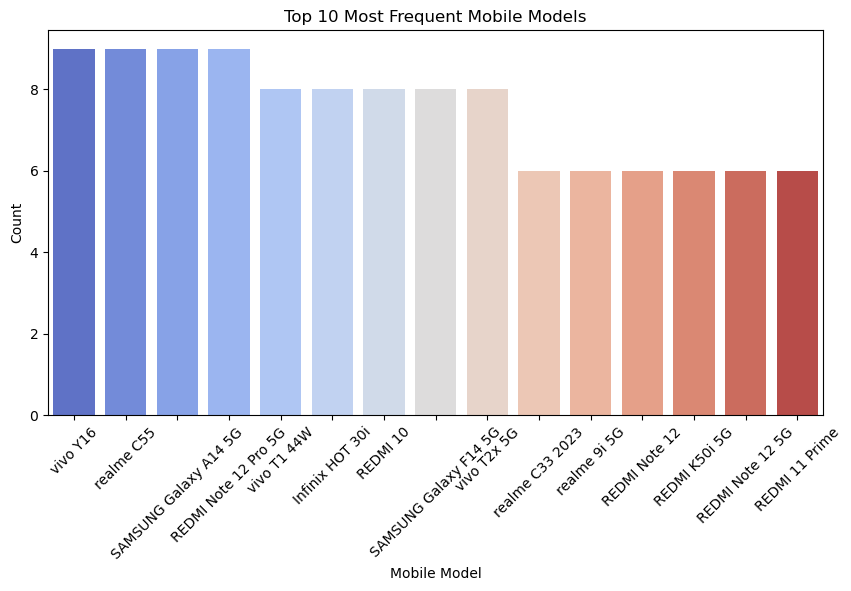

In [2031]:
# Get the top 10 most frequent models
top_models = df["Model"].value_counts().nlargest(15)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=top_models.index, y=top_models.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Mobile Model")
plt.ylabel("Count")
plt.title("Top 10 Most Frequent Mobile Models")
plt.show()


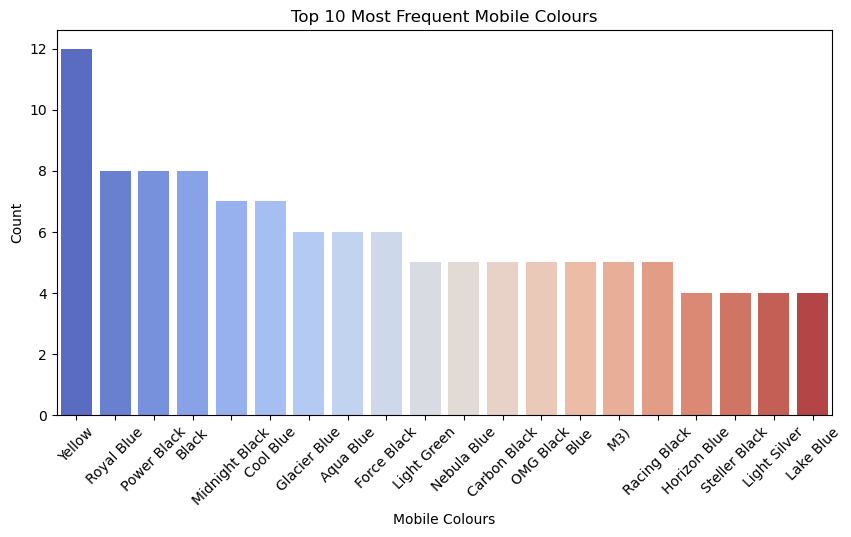

In [2032]:
# Get the top 10 most frequent models
top_colour = df["Colour"].value_counts().nlargest(20)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=top_colour.index, y=top_colour.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Mobile Colours")
plt.ylabel("Count")
plt.title("Top 10 Most Frequent Mobile Colours")
plt.show()

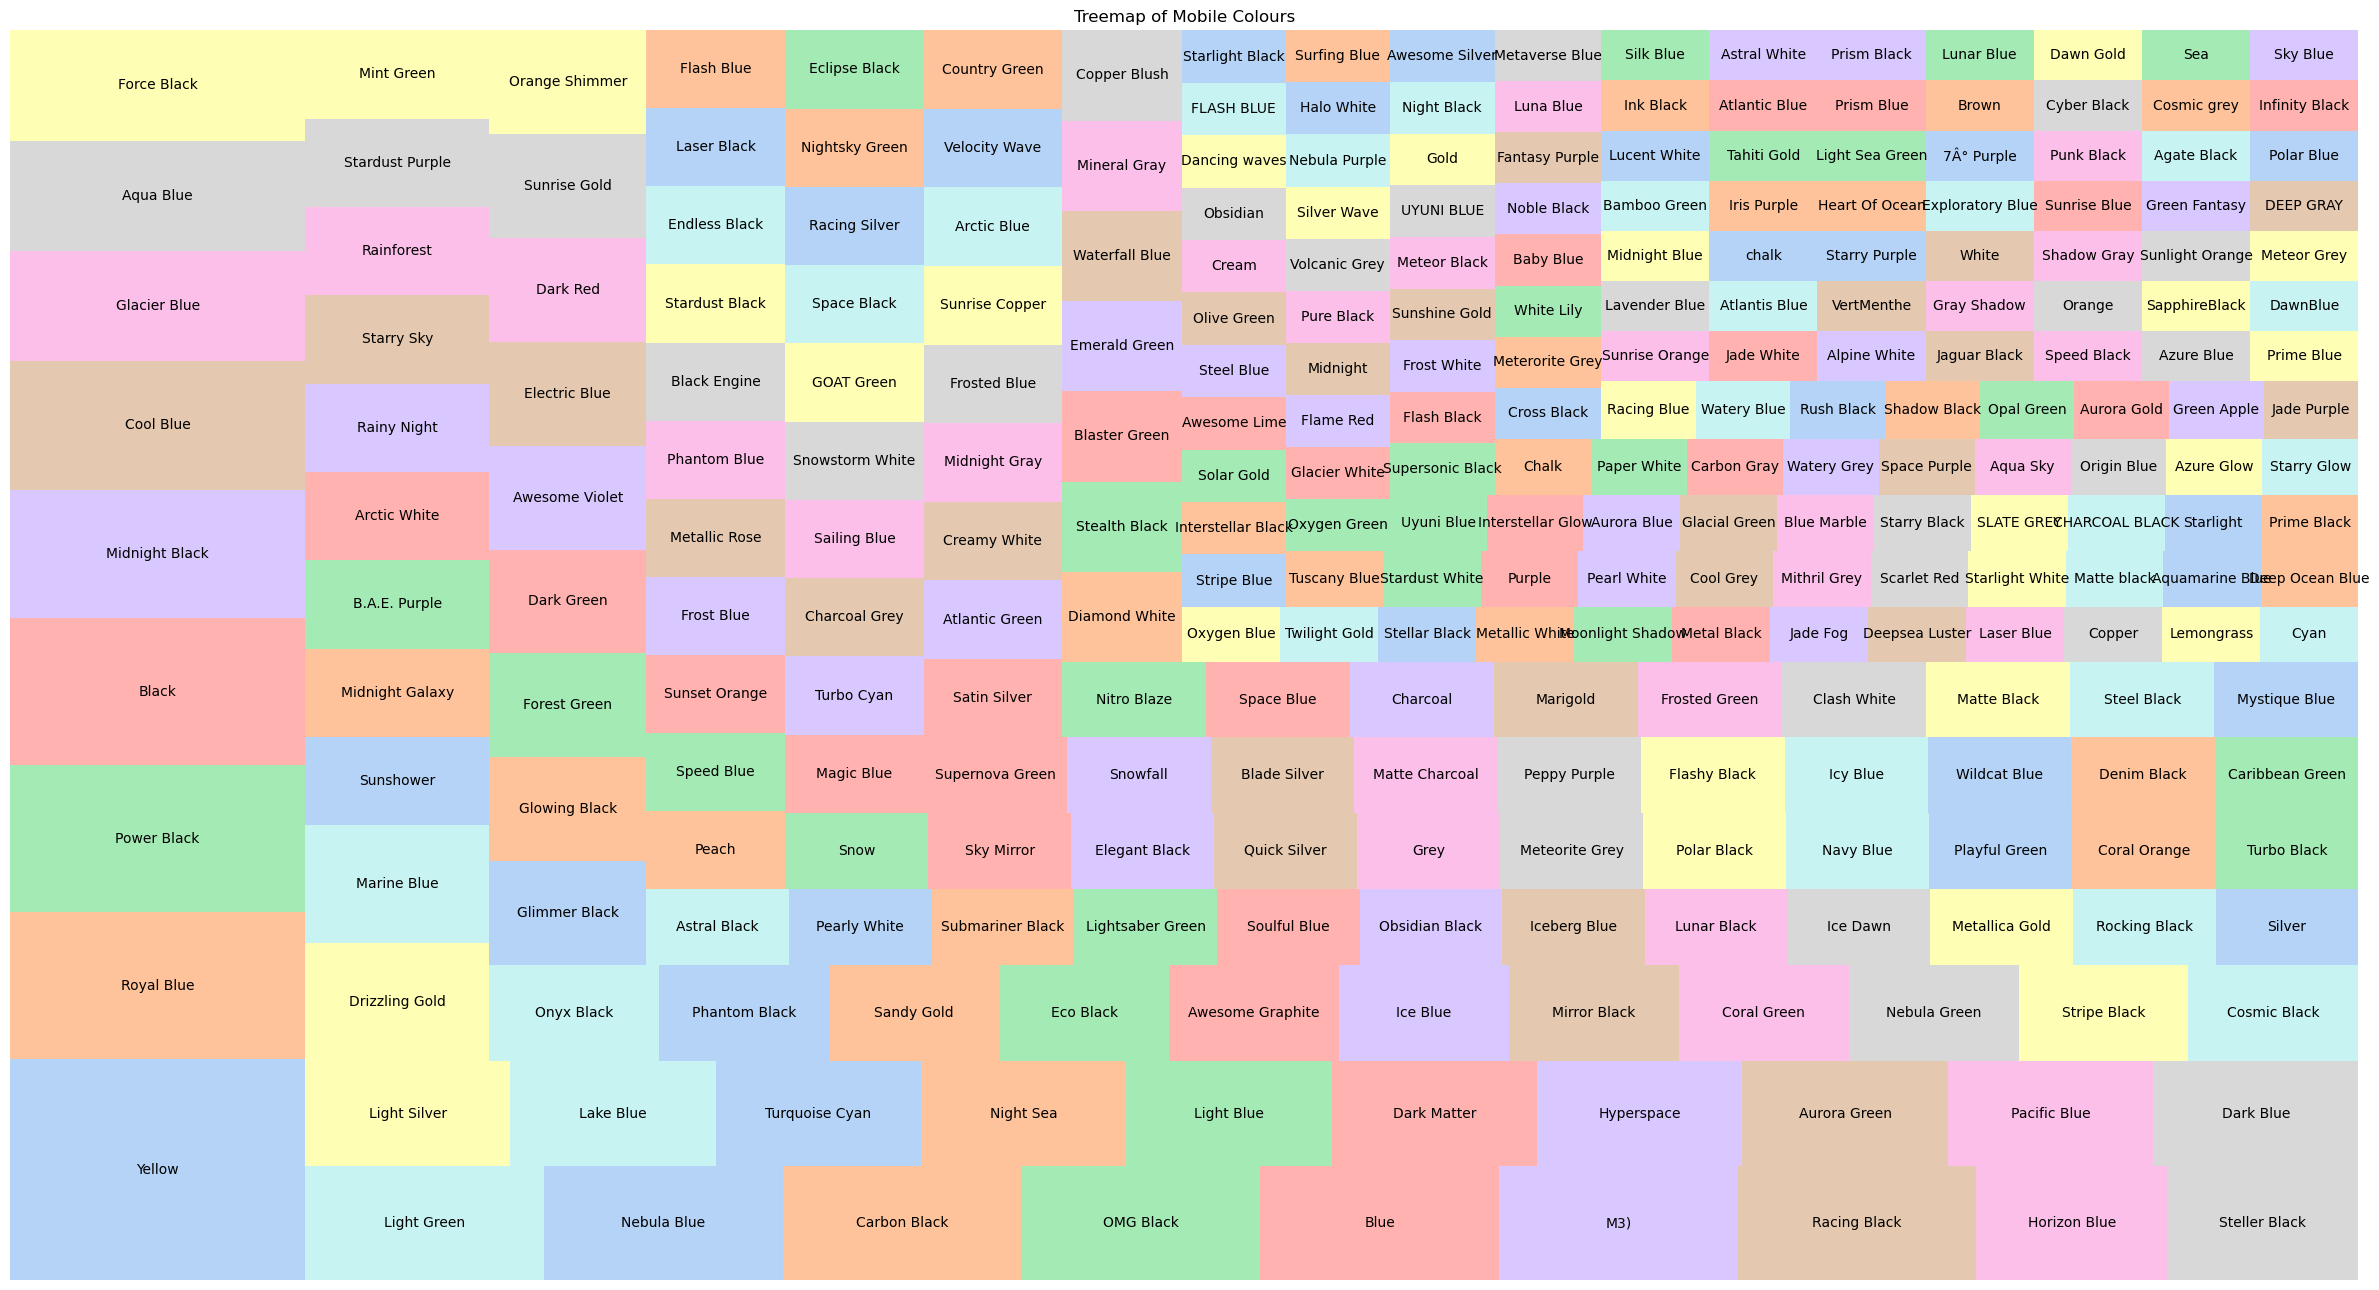

In [2033]:
import squarify  

# Get color counts
color_counts = df["Colour"].value_counts()

# Plot treemap
plt.figure(figsize=(24, 13))
squarify.plot(sizes=color_counts.values, label=color_counts.index, alpha=0.8, color=sns.color_palette("pastel"))
plt.axis("off")
plt.title("Treemap of Mobile Colours")
plt.tight_layout()
plt.show()


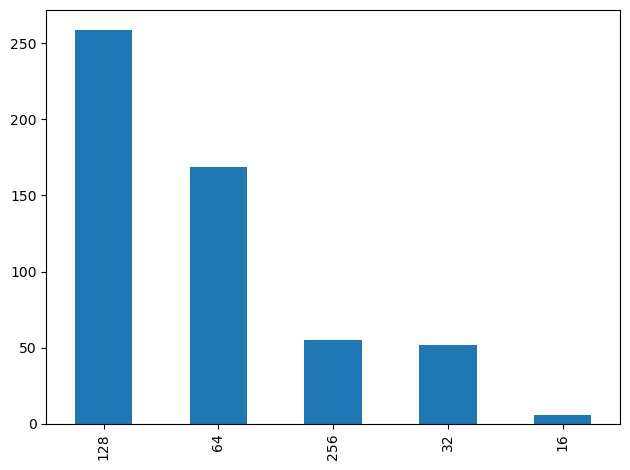

In [2034]:
#counts how many times each unique Memory in the column
df['Memory'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

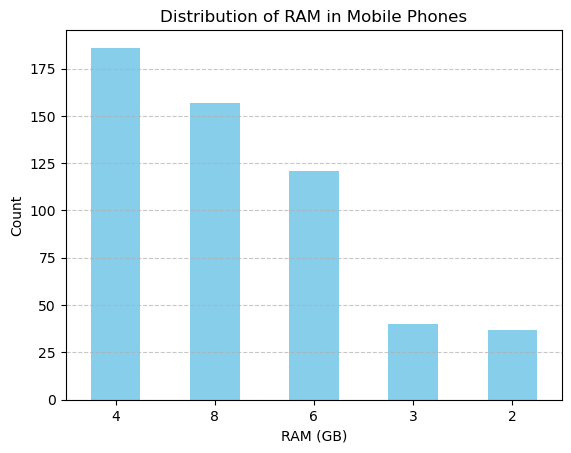

In [2035]:
# Count unique RAM values
df['RAM'].value_counts().plot(kind='bar', color='skyblue')

# Formatting the plot
plt.xlabel("RAM (GB)")
plt.ylabel("Count")
plt.title("Distribution of RAM in Mobile Phones")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

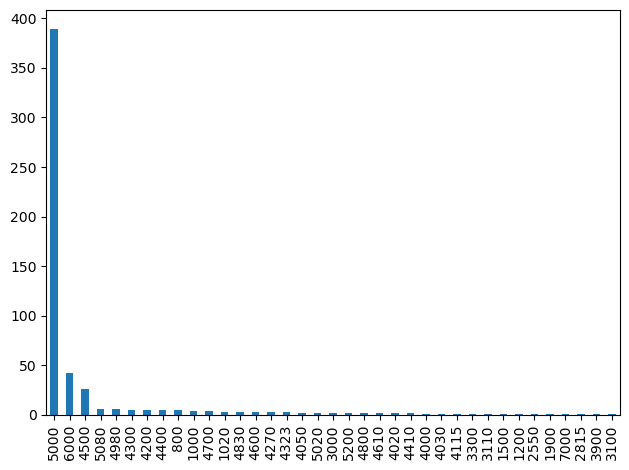

In [2036]:
#counts how many times each unique Battery_ in the column
df['Battery_'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

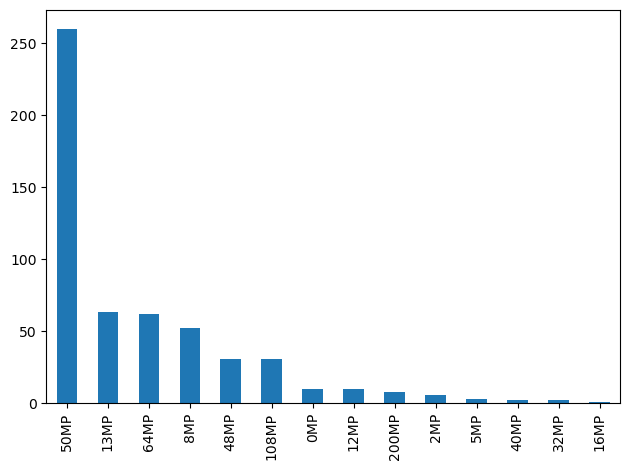

In [2037]:
#counts how many times each unique Rear Camera in the column
df['Rear Camera'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

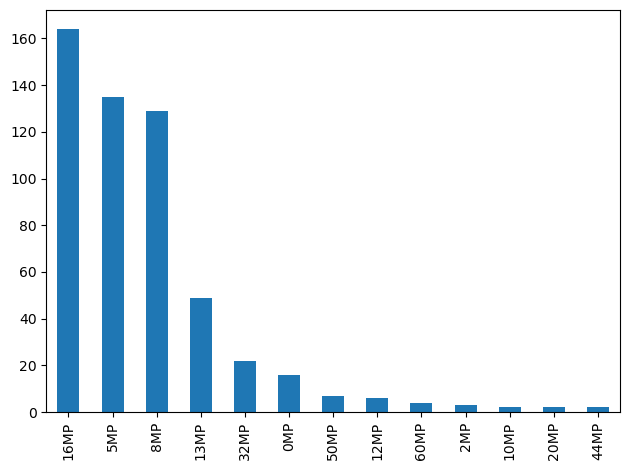

In [2038]:
#counts how many times each unique Front Camera in the column
df['Front Camera'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

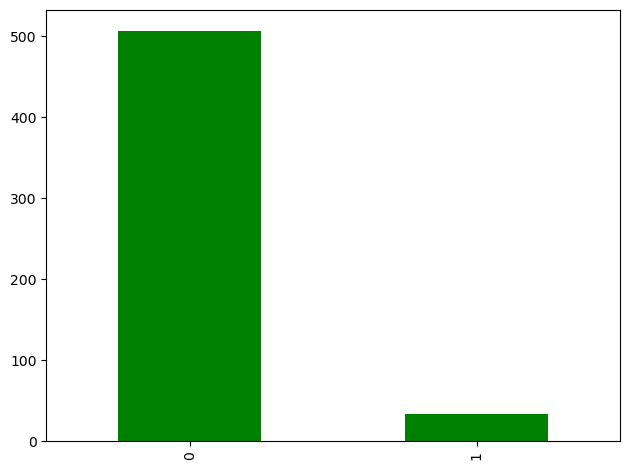

In [2039]:
#counts how many times each unique AI Lens in the column
df['AI Lens'].value_counts().plot(kind='bar',color='green')
plt.tight_layout()
plt.show()

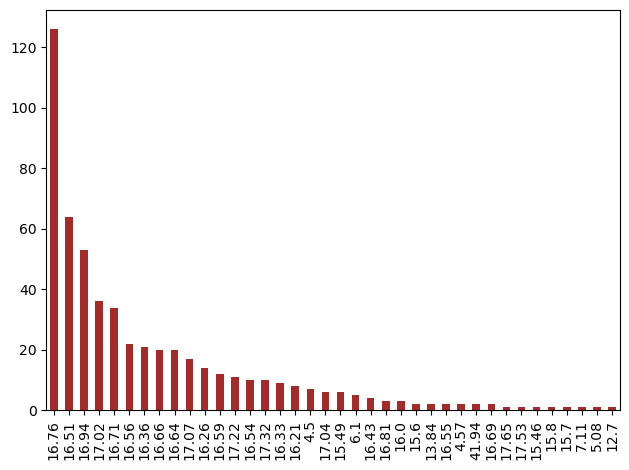

In [2040]:
#counts how many times each unique Mobile Height Lens in the column
df['Mobile Height'].value_counts().plot(kind='bar',color='brown')
plt.tight_layout()
plt.show()

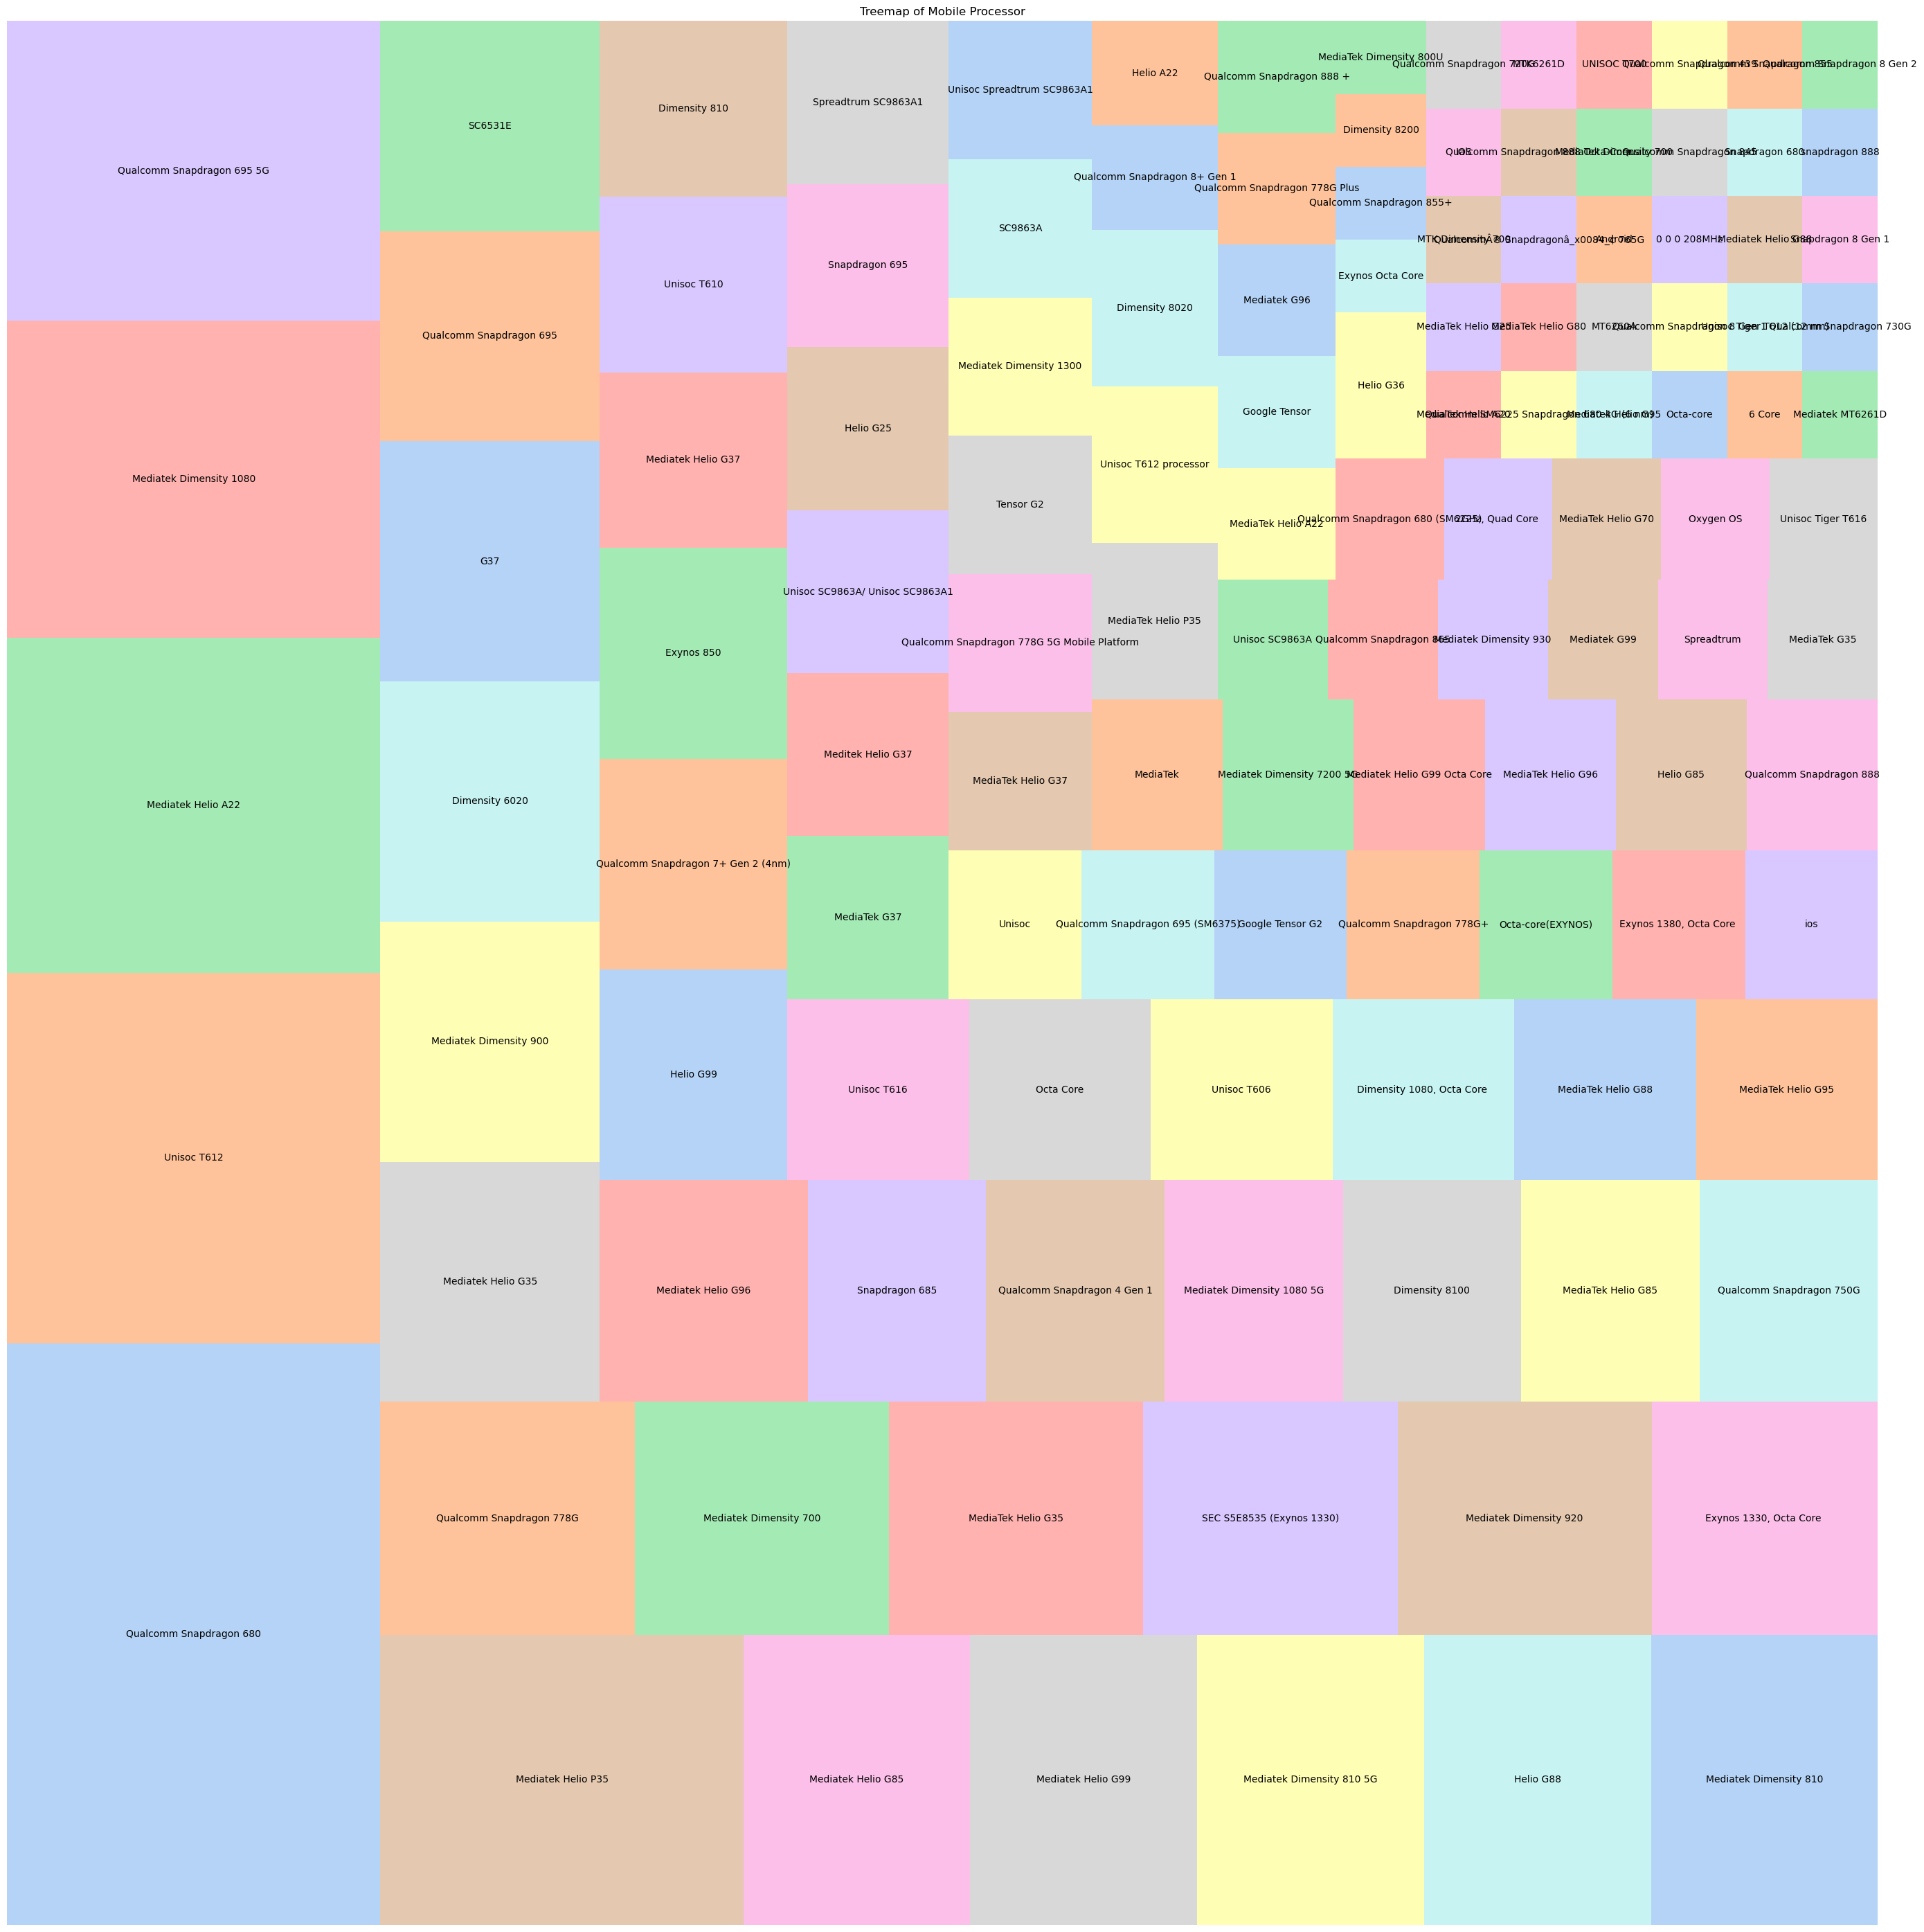

In [2041]:
import squarify  

# Get Processor counts
processor_counts = df["Processor_"].value_counts()

# Plot treemap
plt.figure(figsize=(28, 28))
squarify.plot(sizes=processor_counts.values, label=processor_counts.index, alpha=0.8, color=sns.color_palette("pastel"))
plt.axis("off")
plt.title("Treemap of Mobile Processor")
plt.tight_layout()
plt.show()

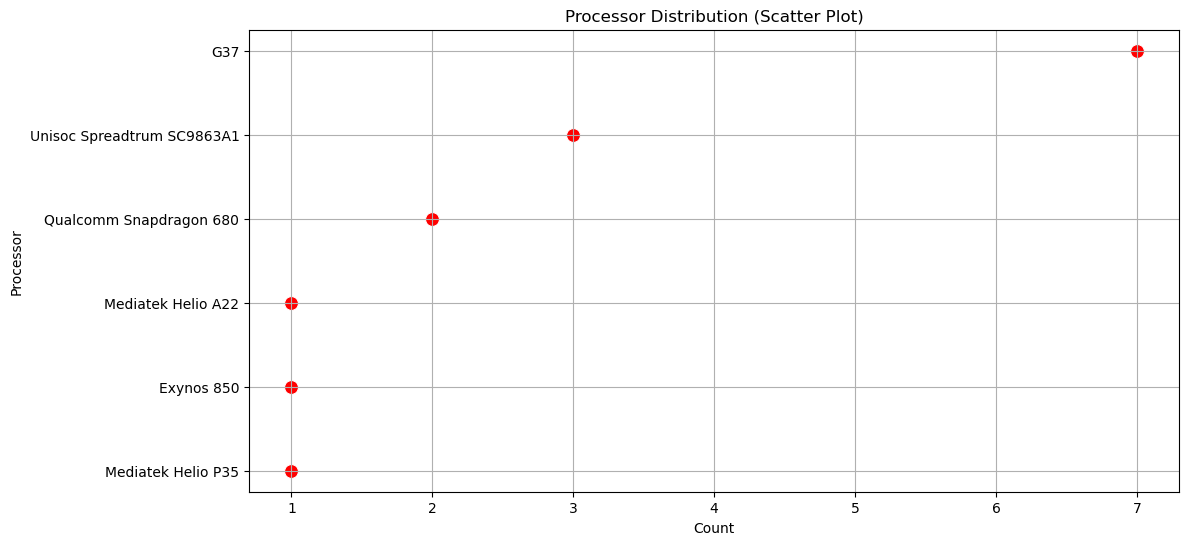

In [2042]:
# Assuming 'df' is your DataFrame and 'Processor' is the column name
Processor_counts = df["Processor_"].head(15).value_counts()

# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=Processor_counts.values, y=Processor_counts.index, color="red", s=100)  # 's' controls marker size
plt.xlabel("Count")
plt.ylabel("Processor")
plt.title("Processor Distribution (Scatter Plot)")
plt.grid(True)
plt.show()

In [2043]:
##check the NAN value
df['Prize'].isna().sum()

0

In [2044]:
# Convert a Prize column in a DataFrame to integer
df['Prize'] = df['Prize'].str.replace(',', '').astype(int)

print(df)


                     Model          Colour  Memory  RAM  Battery_ Rear Camera  \
0          Infinix SMART 7     Night Black      64    4      6000        13MP   
1          Infinix SMART 7      Azure Blue      64    4      6000        13MP   
2             MOTOROLA G32    Mineral Gray     128    8      5000        50MP   
3                 POCO C50      Royal Blue      32    2      5000         8MP   
4          Infinix HOT 30i        Marigold     128    8      5000        50MP   
..                     ...             ...     ...  ...       ...         ...   
536  SAMSUNG Galaxy S23 5G           Cream     256    8      3900        50MP   
537               LAVA Z21            Cyan      32    2      3100         5MP   
538         Tecno Spark 8T  Turquoise Cyan      64    4      5000        50MP   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000        50MP   
540               OPPO A77        Sky Blue     128    4      5000        50MP   

    Front Camera  AI Lens  

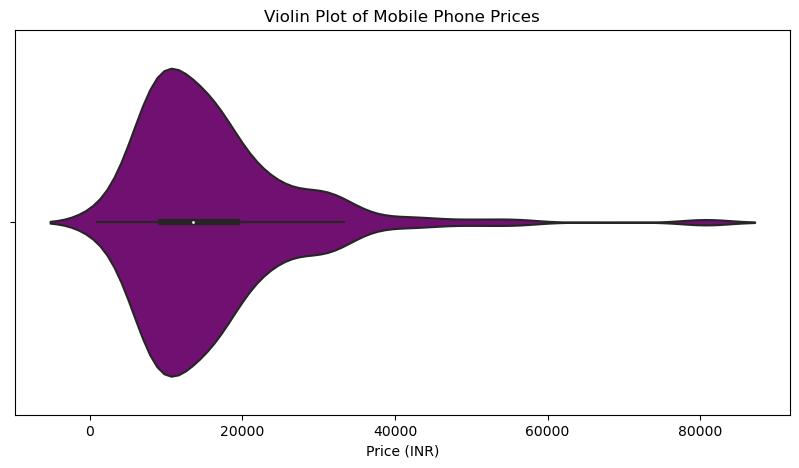

In [2045]:
#check the Prize data using violinplot
plt.figure(figsize=(10, 5))
sns.violinplot(x=df["Prize"], color="purple")
plt.xlabel("Price (INR)")
plt.title("Violin Plot of Mobile Phone Prices")
plt.show()


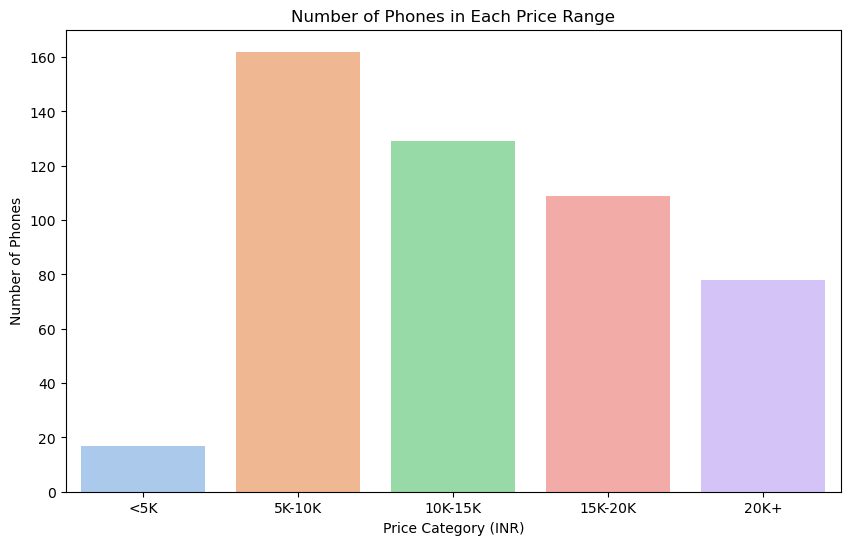

In [2046]:
#check prize column category wise
df["Price Category"] = pd.cut(df["Prize"], bins=[0, 5000, 10000, 15000, 20000, 30000], 
                              labels=["<5K", "5K-10K", "10K-15K", "15K-20K", "20K+"])

plt.figure(figsize=(10, 6))
sns.countplot(x="Price Category", data=df, palette="pastel")
plt.xlabel("Price Category (INR)")
plt.ylabel("Number of Phones")
plt.title("Number of Phones in Each Price Range")
plt.show()


In [2047]:
#check the index
df.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize',
       'Price Category'],
      dtype='object')

In [2048]:
df.head(2)

Model       Colour  Memory  RAM  Battery_ Rear Camera  \
0  Infinix SMART 7  Night Black      64    4      6000        13MP   
1  Infinix SMART 7   Azure Blue      64    4      6000        13MP   

  Front Camera  AI Lens  Mobile Height                  Processor_  Prize  \
0          5MP        1          16.76  Unisoc Spreadtrum SC9863A1   7299   
1          5MP        1          16.76  Unisoc Spreadtrum SC9863A1   7299   

  Price Category  
0         5K-10K  
1         5K-10K

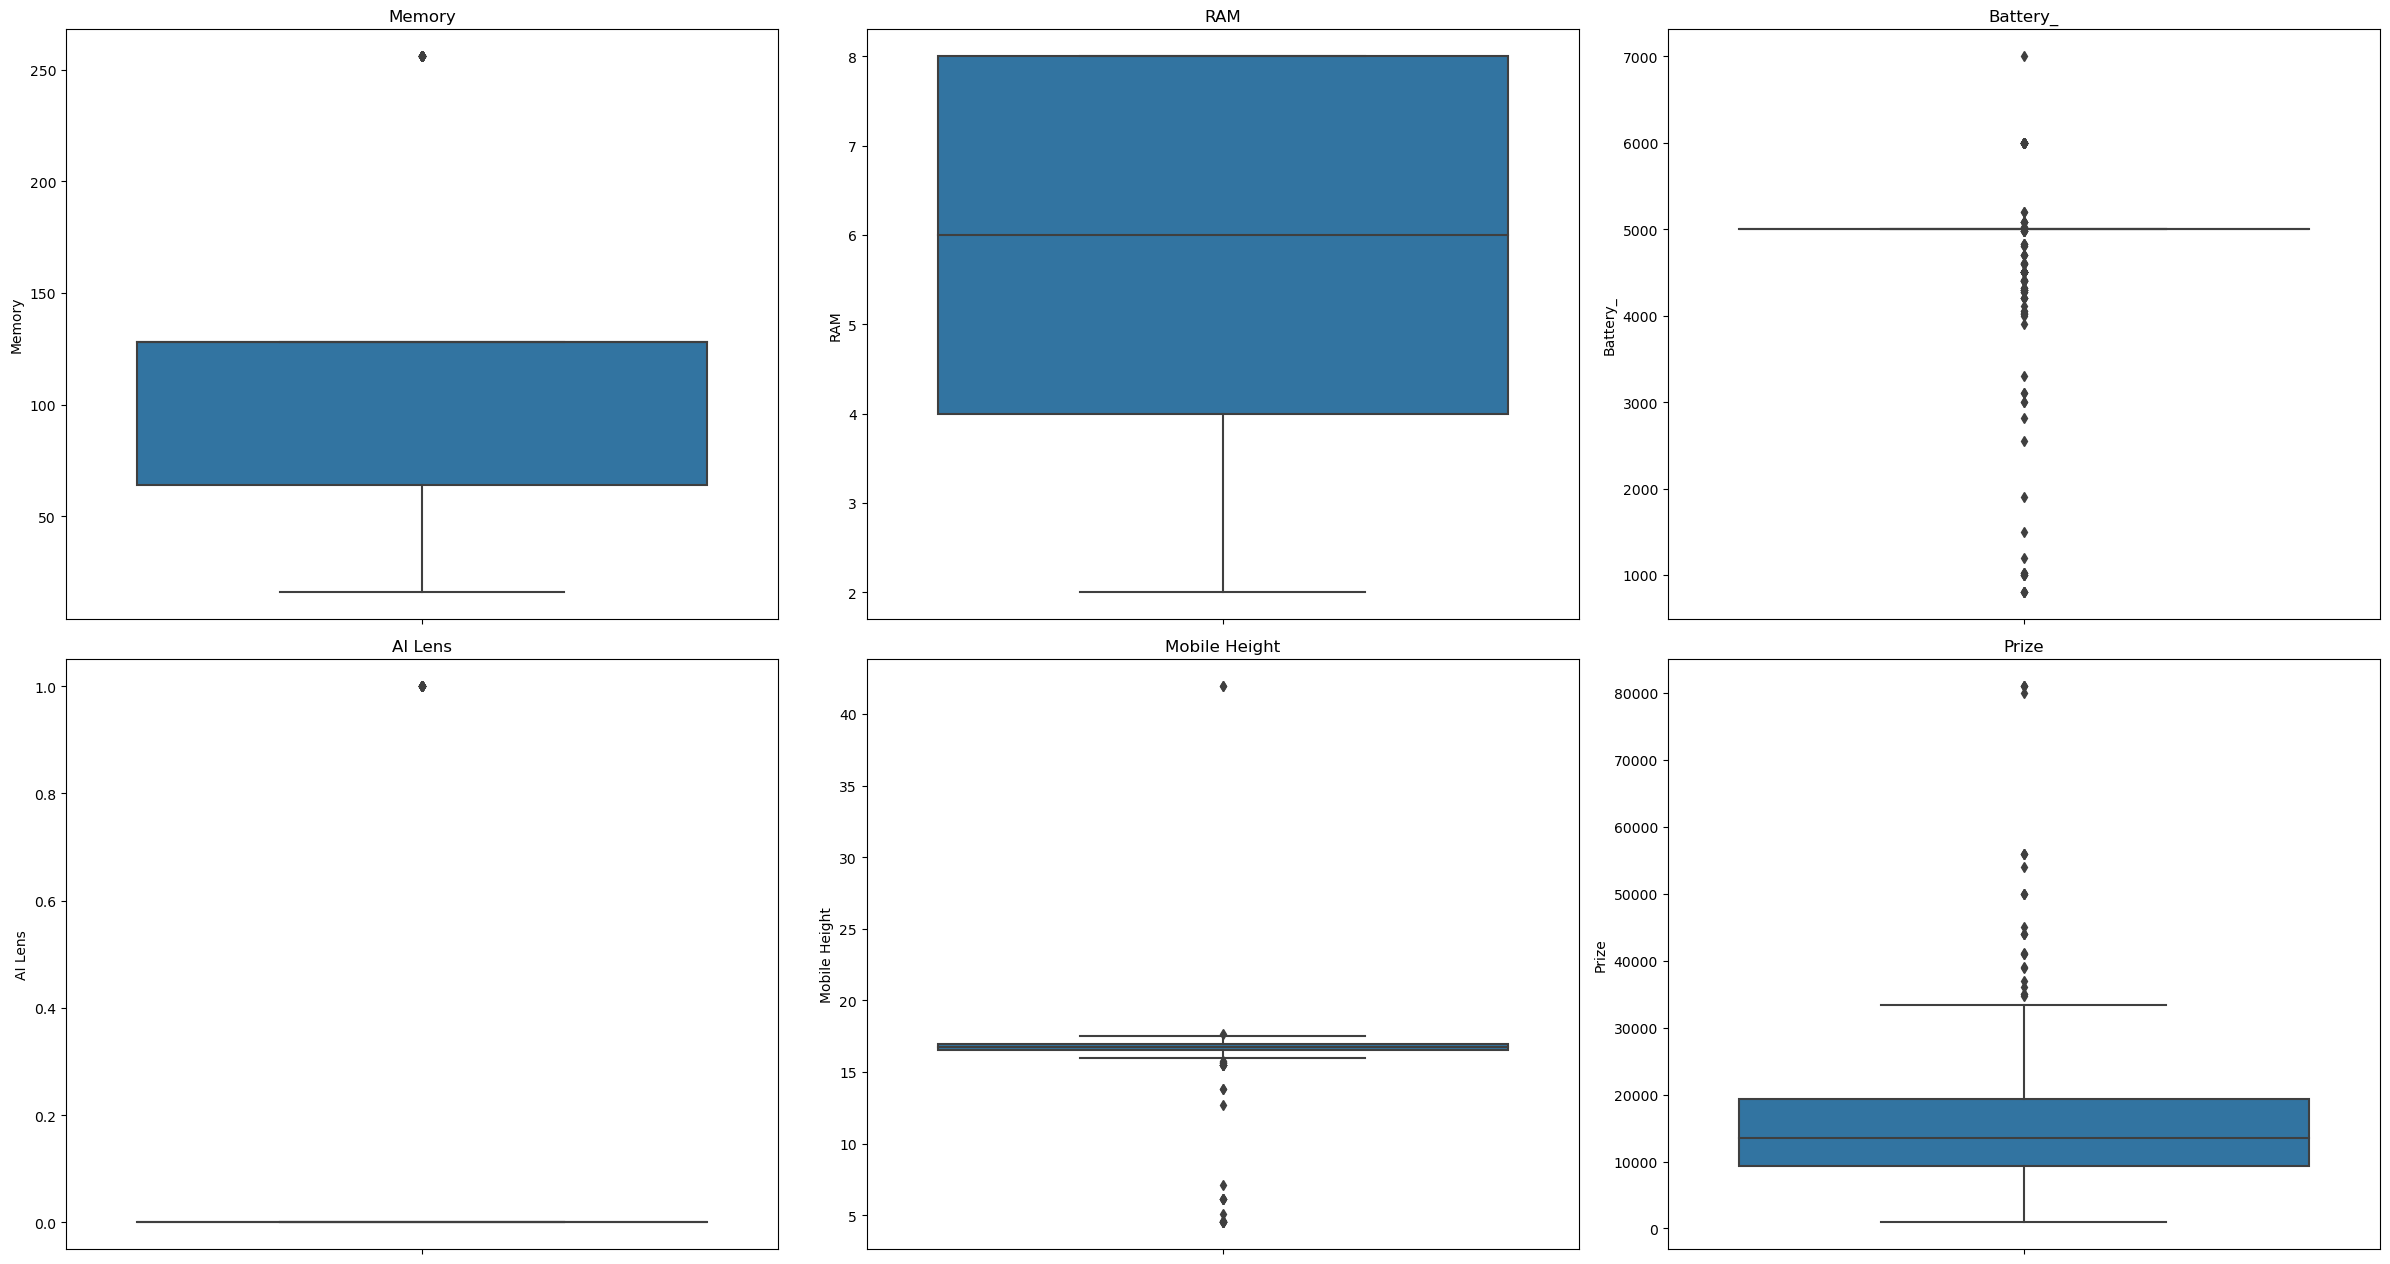

In [2049]:

#check the all data outlaier by sub boxplot
numerical=df.select_dtypes(include=['float64','int32','int64']).columns
plt.figure(figsize=(24,19))
for i,col in enumerate(numerical,1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [2050]:
import numpy as np

# Iterate only over numeric columns
for i in df.select_dtypes(include=["int64", "float64","int32"]).columns:
    
    # Calculate quantiles
    Q1 = df[i].quantile(0.25)
    Q2 = df[i].quantile(0.50)
    Q3 = df[i].quantile(0.75)
    
    # Calculate Inter-Quantile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate lower and upper limits for outliers
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    
    # Print quantile and IQR information
    print(f"The first quantile for the column {i} is given by {Q1}")
    print(f"The second quantile for the column {i} is given by {Q2}")
    print(f"The third quantile for the column {i} is given by {Q3}")
    print(f"The interquantile range for the column {i} is given by {IQR}")
    print(f"The lower limit for the column {i} is given by {LL}")
    print(f"The upper limit for the column {i} is given by {UL}")
    
    # Count the number of outliers
    num_outliers = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print(f"The number of outliers for column {i} is given by {num_outliers}")
    
    # Impute outliers with the mean of the column
    df[i] = np.where((df[i] < LL) | (df[i] > UL), df[i].mean(), df[i])
    
    # Count the number of outliers after imputation
    num_outliers_after_imputation = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print(f"The number of outliers after imputation is given by {num_outliers_after_imputation}")
    
    # Add some spacing between columns for clarity
    print("\n" + "-"*50 + "\n")

The first quantile for the column Memory is given by 64.0
The second quantile for the column Memory is given by 128.0
The third quantile for the column Memory is given by 128.0
The interquantile range for the column Memory is given by 64.0
The lower limit for the column Memory is given by -32.0
The upper limit for the column Memory is given by 224.0
The number of outliers for column Memory is given by 55
The number of outliers after imputation is given by 0

--------------------------------------------------

The first quantile for the column RAM is given by 4.0
The second quantile for the column RAM is given by 6.0
The third quantile for the column RAM is given by 8.0
The interquantile range for the column RAM is given by 4.0
The lower limit for the column RAM is given by -2.0
The upper limit for the column RAM is given by 14.0
The number of outliers for column RAM is given by 0
The number of outliers after imputation is given by 0

--------------------------------------------------



In [2051]:
#using IQR Method to remove Outlaier
df['AI Lens']=np.where((df['AI Lens']<0)|(df['AI Lens']>0),df['AI Lens'].median(),df['AI Lens'])

In [2052]:
#using IQR Method to remove Outlaier
df['Prize']=np.where((df['Prize']<-5695.0)|(df['Prize']>34265.0),df['Prize'].median(),df['Prize'])

In [2053]:
#Create a def function to remove outlaier for Mobile Hieght columns
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [2054]:
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['Mobile Height'])

In [2055]:
df['Mobile Height'] = np.where(df['Mobile Height']>upper_limit_iqr,upper_limit_iqr,np.where(df['Mobile Height']<lower_limit_iqr,lower_limit_iqr,df['Mobile Height']))

In [2056]:
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['Prize'])

In [2057]:
df['Prize'] = np.where(df['Prize']>upper_limit_iqr,upper_limit_iqr,np.where(df['Prize']<lower_limit_iqr,lower_limit_iqr,df['Prize']))

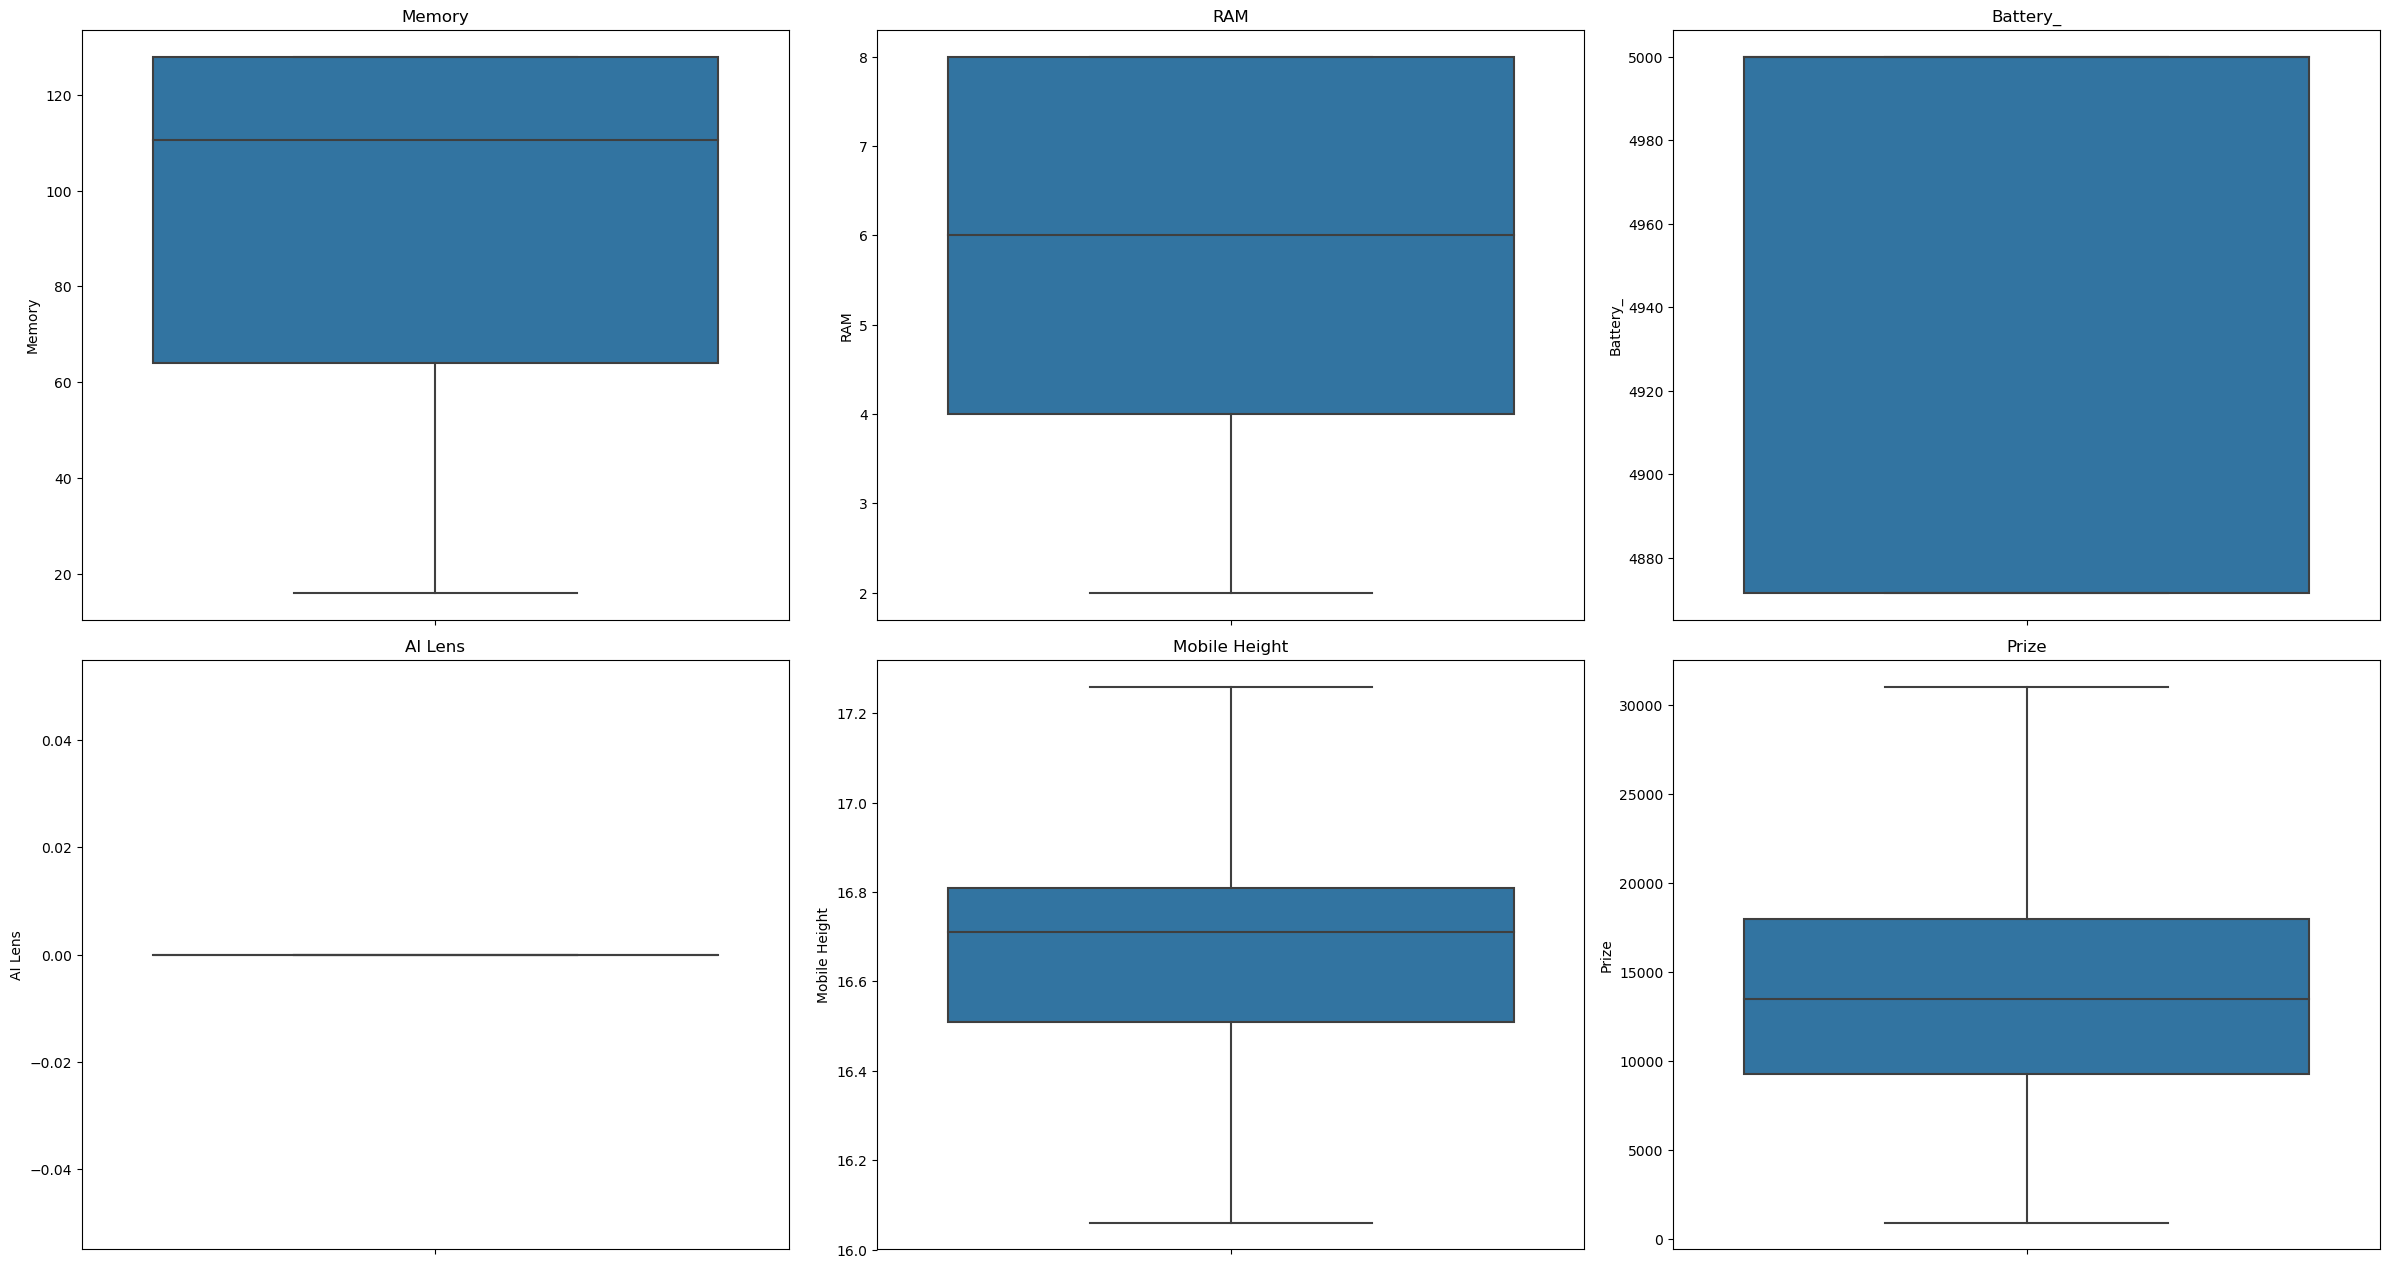

In [2058]:
#Remove the Outlaier
##handle the Outlaier Data
#check the all data outlaier by sub boxplot
numerical=df.select_dtypes(include=['float64','int32','int64']).columns
plt.figure(figsize=(24,19))
for i,col in enumerate(numerical,1):
    plt.subplot(3,3,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

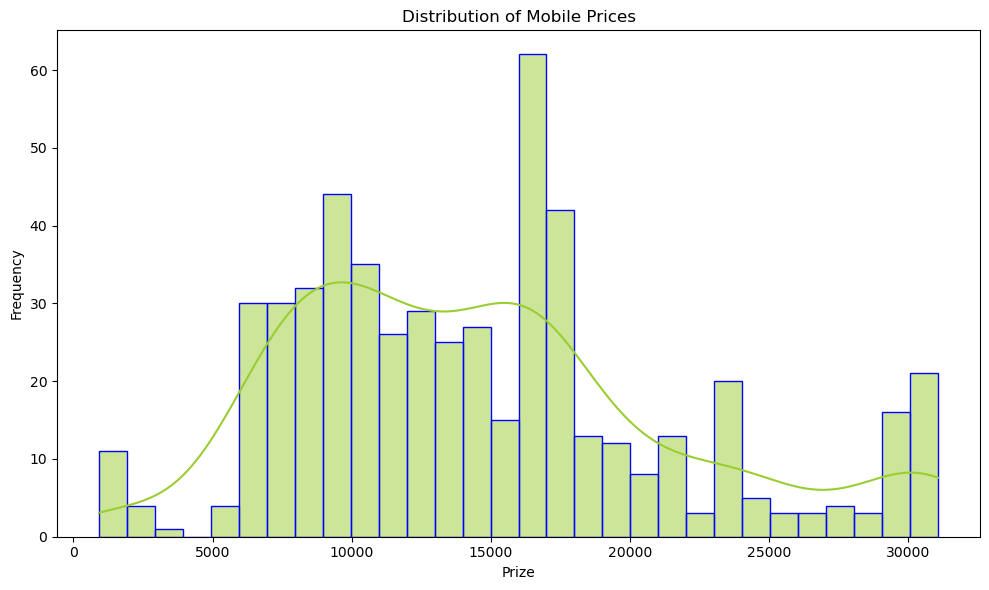

In [2059]:
# Univariate analysis for Mobile prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Prize'], kde=True,bins=30, color='yellowgreen',edgecolor='blue')
plt.title('Distribution of Mobile Prices')
plt.xlabel('Prize')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

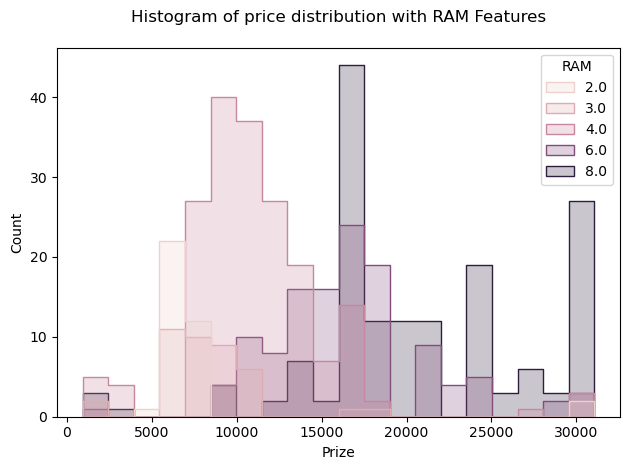

In [2060]:
#histogram for mobile prize
sns.histplot(data=df,x='Prize', bins = 20,hue = 'RAM',element='step')
plt.title('Histogram of price distribution with RAM Features\n')
plt.tight_layout()
plt.show()

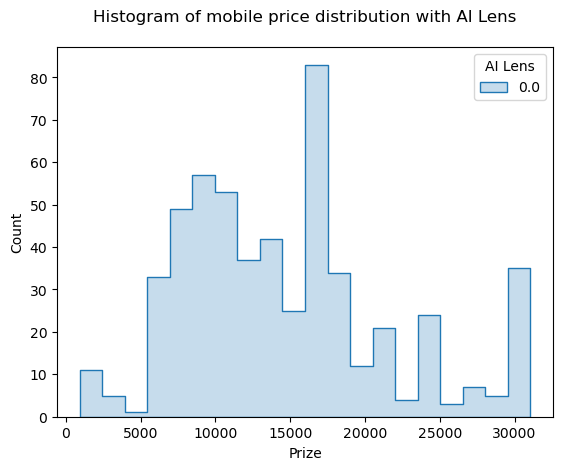

In [2061]:
sns.histplot(data = df,x='Prize',bins = 20,element='step',hue = 'AI Lens',color='green')
plt.title('Histogram of mobile price distribution with AI Lens\n')
plt.show()

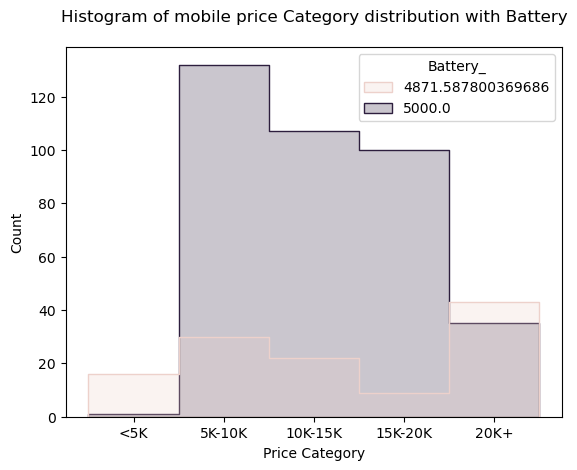

In [2062]:
sns.histplot(data = df,x='Price Category',bins = 20,element='step',hue = 'Battery_',color='green')
plt.title('Histogram of mobile price Category distribution with Battery\n')
plt.show()

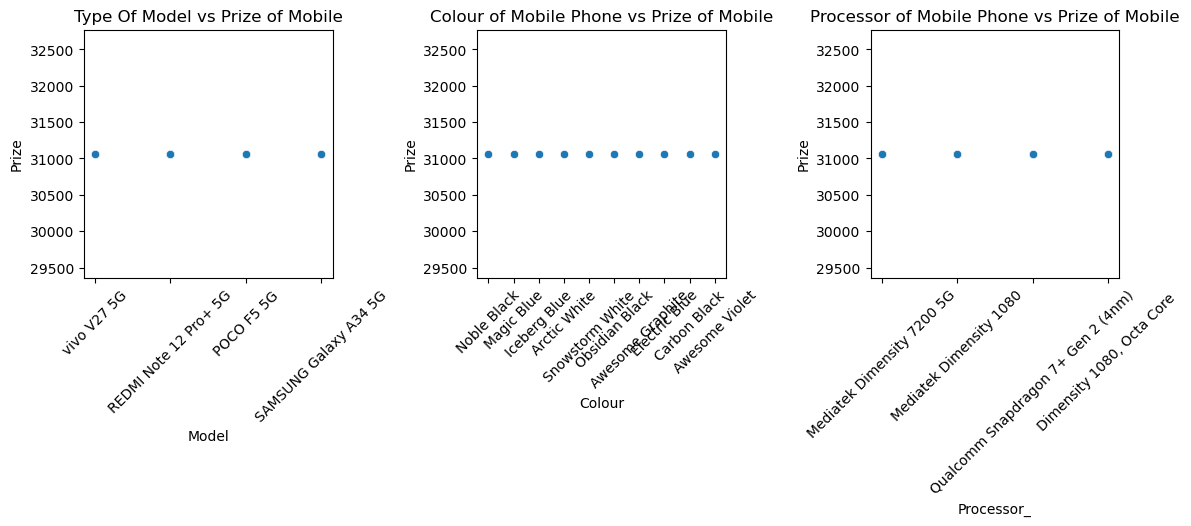

In [2063]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 most expensive models
top_10 = df.nlargest(10, 'Prize')

plt.figure(figsize=(12, 8))  # Adjust figure size

# Scatter plot: Model vs Prize
plt.subplot(2, 3, 1)  # 2x3 grid, 1st subplot
sns.scatterplot(x='Model', y='Prize', data=top_10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Type Of Model vs Prize of Mobile')

# Scatter plot: Colour vs Prize
plt.subplot(2, 3, 2)  # 2x3 grid, 2nd subplot
sns.scatterplot(x='Colour', y='Prize', data=top_10)
plt.xticks(rotation=45)
plt.title('Colour of Mobile Phone vs Prize of Mobile')

# Scatter plot: Processor vs Prize
plt.subplot(2, 3, 3)  # 2x3 grid, 3rd subplot
sns.scatterplot(x='Processor_', y='Prize', data=top_10)
plt.xticks(rotation=45)
plt.title('Processor of Mobile Phone vs Prize of Mobile')

plt.tight_layout()  # Adjust layout
plt.show()


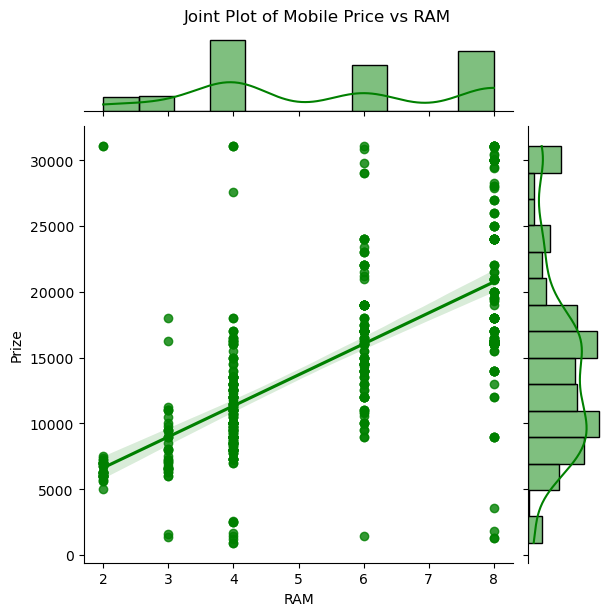

In [2064]:
# Create a joint plot between price and Memory
sns.jointplot(x='RAM', y='Prize', data=df, kind='reg', color='green')

# Set the title for the plot
plt.suptitle('Joint Plot of Mobile Price vs RAM', y=1.02)
plt.show()

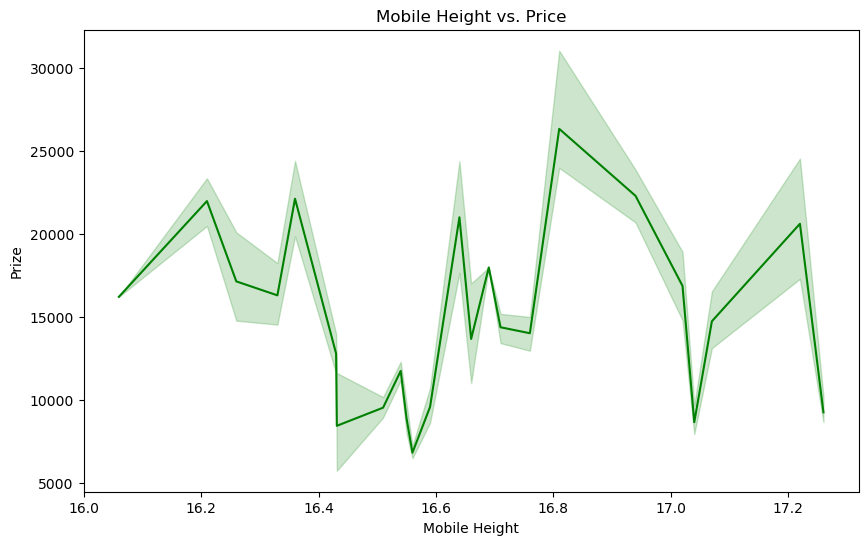

In [2065]:
# Explore price per Mobile Height
plt.figure(figsize=(10, 6))
sns.lineplot(x='Mobile Height', y='Prize', data=df,color='green')
plt.title('Mobile Height vs. Price')
plt.show()

<Figure size 1000x600 with 0 Axes>

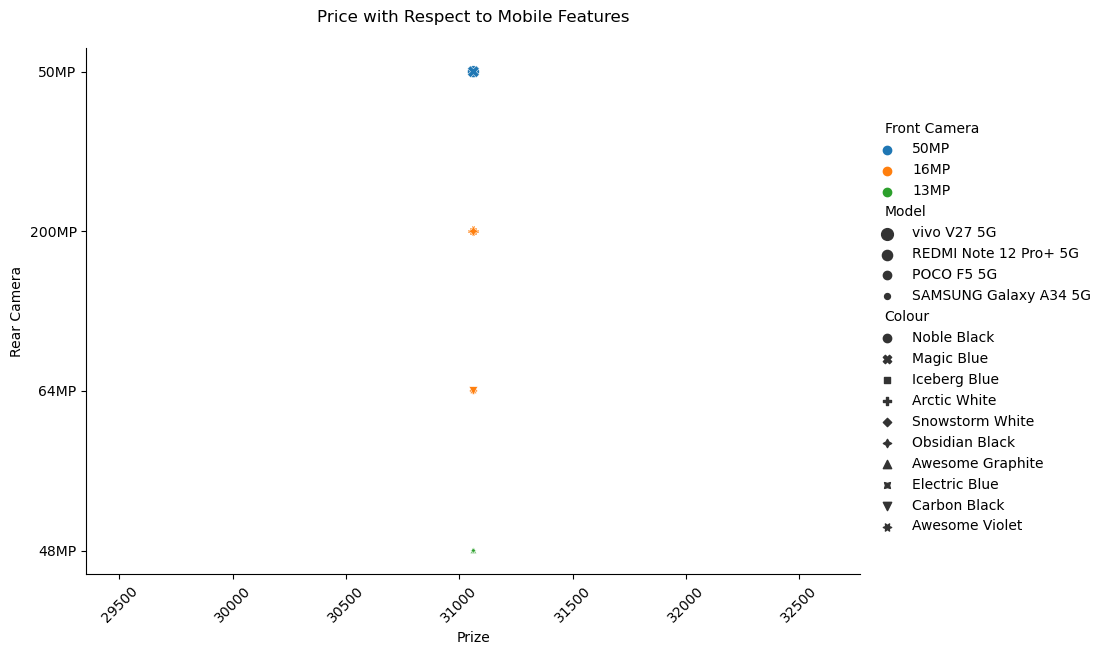

In [2066]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 mobiles based on price
top_10 = df.nlargest(10, 'Prize')

# Scatter plot: Price vs Rear Camera, with Model size and Front Camera hue
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.relplot(
    data=top_10,
    x='Prize',
    y='Rear Camera',
    kind='scatter',
    size='Model', 
    hue='Front Camera',
    style='Colour',
    height=6, aspect=1.5  # Adjust plot size
)

plt.title('Price with Respect to Mobile Features\n')
plt.xticks(rotation=45)
plt.show()


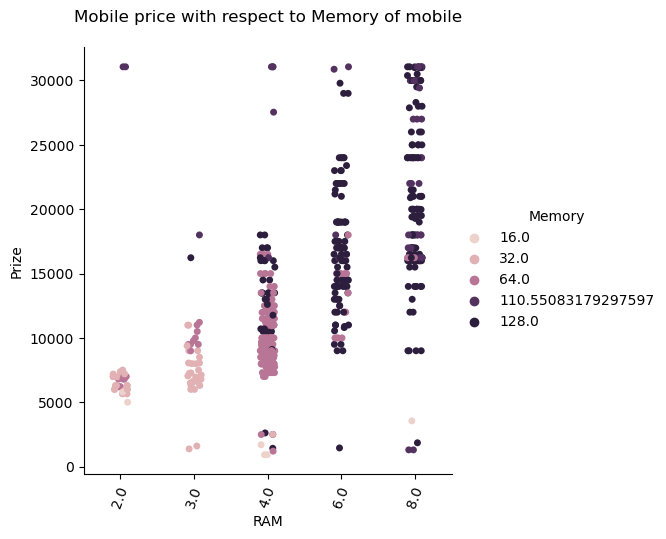

In [2067]:
##Mobile price with Ram,Memory
sns.catplot(data = df, x = 'RAM',y = 'Prize',kind='strip', hue = 'Memory')
plt.title('Mobile price with respect to Memory of mobile\n')
plt.xticks(rotation=70)
plt.show()

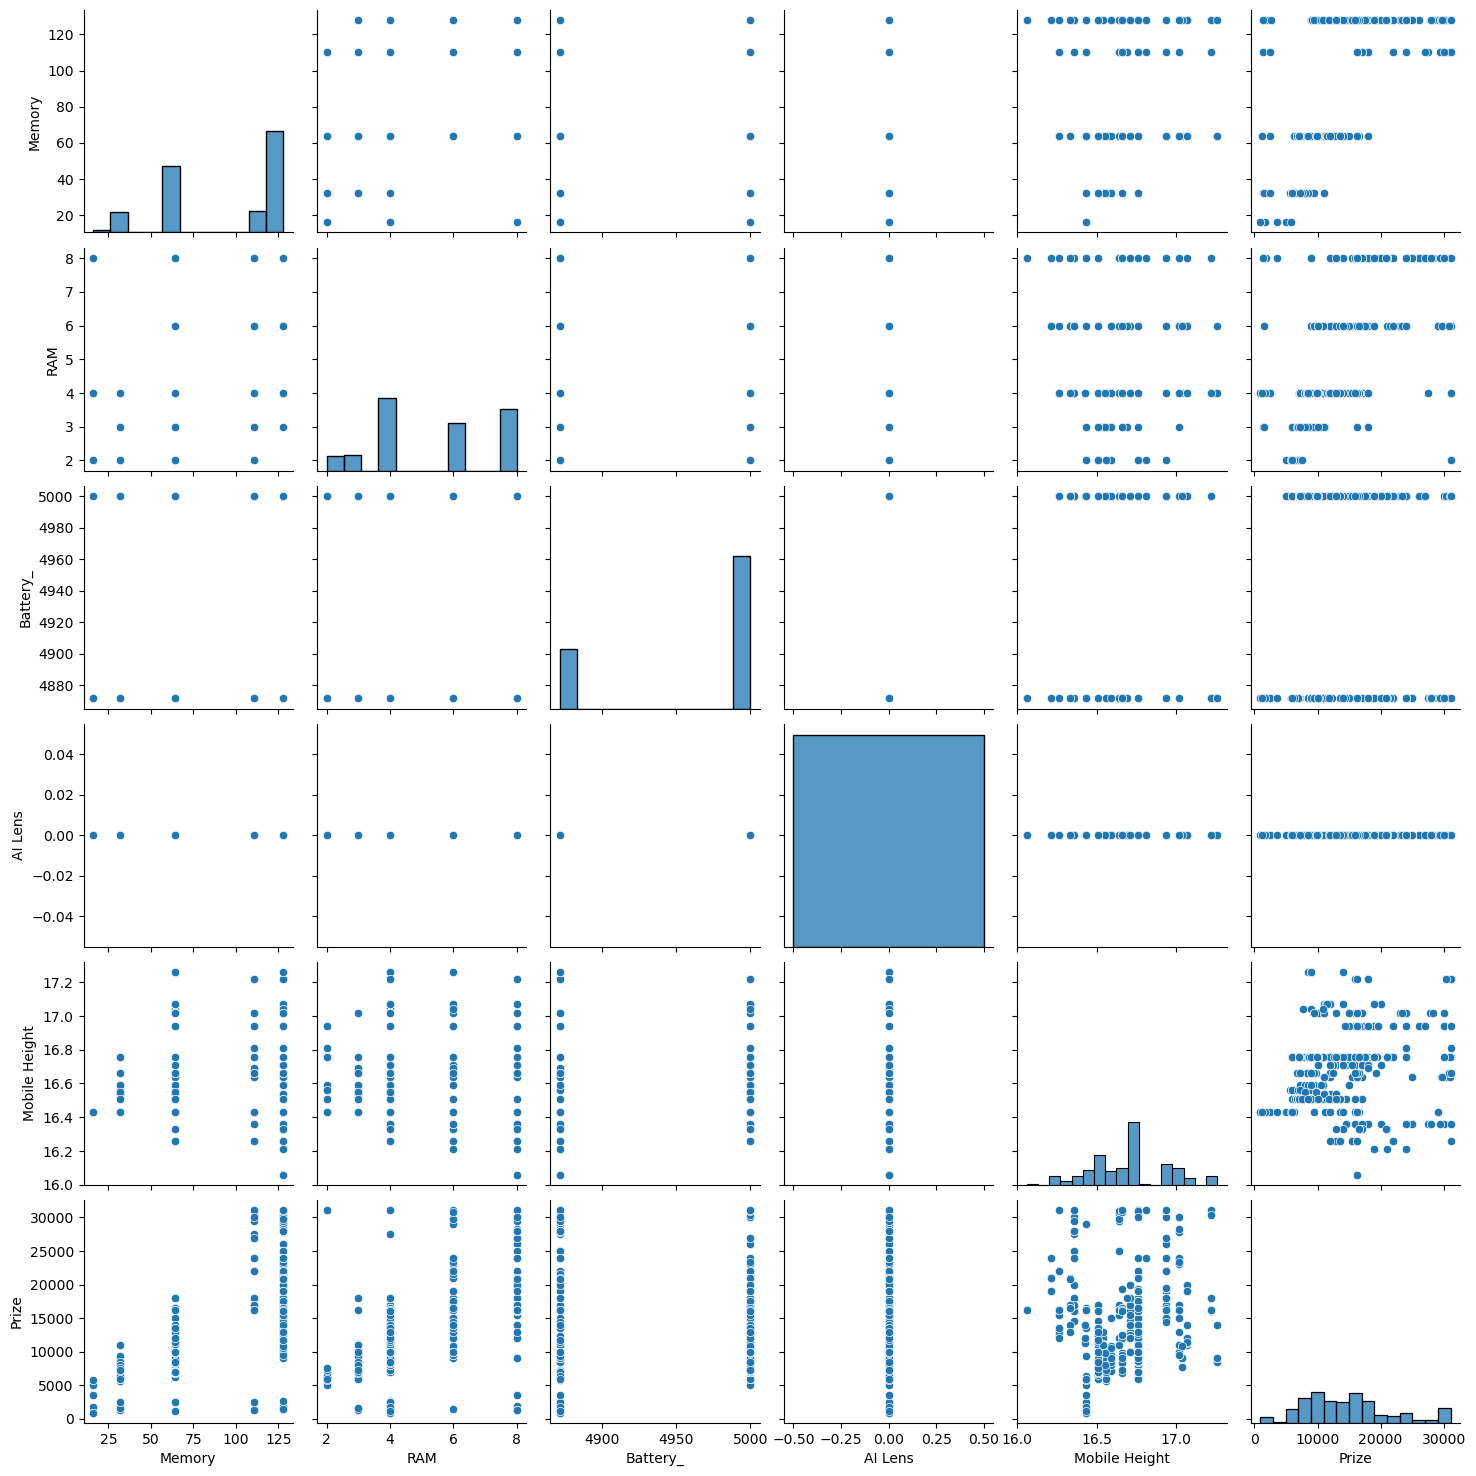

<Figure size 640x480 with 0 Axes>

In [2068]:
###Pair plot to this data
sns.pairplot(df[['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize']])
plt.show()
# Adding a title
plt.suptitle('Pairplot: Relationships Between Features and Mobile Prices', y=1.02)
plt.show()

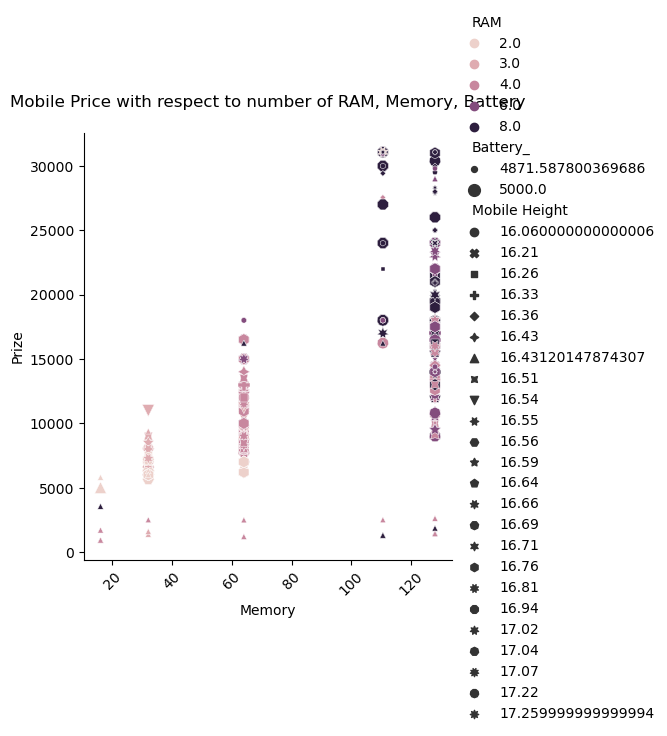

In [2069]:
## Size Impact:
sns.relplot(data = df,y='Prize',x='Memory',kind = 'scatter',size='Battery_',hue = 'RAM',style = 'Mobile Height')
plt.title('Mobile Price with respect to number of RAM, Memory, Battery\n')
plt.xticks(rotation=45)
plt.show()

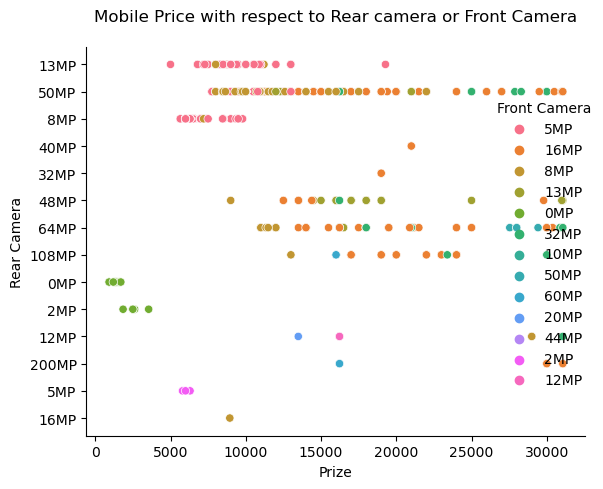

In [2070]:
##Size impact
sns.relplot(data = df,x='Prize',y='Rear Camera',hue = 'Front Camera')
plt.title('Mobile Price with respect to Rear camera or Front Camera\n')
plt.tight_layout()
plt.show()

In [2071]:
##Feature Extraction:
#Battery Efficiency: We can create a feature battery_efficiency by dividing the battery capacity by the RAM (or Memory) 
#to check how efficient the battery is relative to the device's power requirements
# Assuming df contains the columns 'Battery_' and 'RAM'
# Compute Battery Efficiency (Battery per RAM)
df['battery_efficiency'] = df['Battery_'] / df['RAM']

In [2072]:
# Convert camera resolution (e.g., '13MP') to integer (e.g., 13)
df['Rear_Camera_MP'] = df['Rear Camera'].str.replace('MP', '').astype(int)
df['Front_Camera_MP'] = df['Front Camera'].str.replace('MP', '').astype(int)

# Calculate the camera quality ratio
##df['camera_quality_ratio'] = df['Rear_Camera_MP'] / df['Front_Camera_MP']

# View the resulting DataFrame with the new feature
print(df[['Rear Camera', 'Front Camera', 'RAM']])


    Rear Camera Front Camera  RAM
0          13MP          5MP  4.0
1          13MP          5MP  4.0
2          50MP         16MP  8.0
3           8MP          5MP  2.0
4          50MP          5MP  8.0
..          ...          ...  ...
536        50MP         12MP  8.0
537         5MP          2MP  2.0
538        50MP          8MP  4.0
539        50MP         32MP  8.0
540        50MP          8MP  4.0

[541 rows x 3 columns]


In [2073]:
# Calculate price per RAM
df['price_per_ram'] = df['Prize'] / df['RAM']

# View the resulting DataFrame with the new feature
print(df[['Prize', 'RAM', 'price_per_ram']])


            Prize  RAM  price_per_ram
0     7299.000000  4.0    1824.750000
1     7299.000000  4.0    1824.750000
2    11999.000000  8.0    1499.875000
3     5649.000000  2.0    2824.500000
4     8999.000000  8.0    1124.875000
..            ...  ...            ...
536  16228.375231  8.0    2028.546904
537   5998.000000  2.0    2999.000000
538   9990.000000  4.0    2497.500000
539  16228.375231  8.0    2028.546904
540  15999.000000  4.0    3999.750000

[541 rows x 3 columns]


In [2074]:

# Calculate price per memory
df['price_per_memory'] = df['Prize'] / df['Memory']




In [2075]:
##Extract Brand model
import pandas as pd

def extract_brand(model_name):
    return model_name.split()[0]

df['Brand'] = df['Model'].apply(extract_brand)

In [2076]:
##Extract Model name
def extract_series(model_name):
    parts = model_name.split()
    if len(parts) > 1:
        return parts[1]
    else:
        return None  # Handle cases with only one word

df['Series'] = df['Model'].apply(extract_series)

In [2077]:
##Extract Model Number
import re

def extract_number(model_name):
    match = re.search(r'\d+', model_name)
    if match:
        return int(match.group())
    else:
        return None

df['Model_Number'] = df['Model'].apply(extract_number)

In [2078]:
df.head(2)

Model       Colour  Memory  RAM   Battery_ Rear Camera  \
0  Infinix SMART 7  Night Black    64.0  4.0  4871.5878        13MP   
1  Infinix SMART 7   Azure Blue    64.0  4.0  4871.5878        13MP   

  Front Camera  AI Lens  Mobile Height                  Processor_   Prize  \
0          5MP      0.0          16.76  Unisoc Spreadtrum SC9863A1  7299.0   
1          5MP      0.0          16.76  Unisoc Spreadtrum SC9863A1  7299.0   

  Price Category  battery_efficiency  Rear_Camera_MP  Front_Camera_MP  \
0         5K-10K          1217.89695              13                5   
1         5K-10K          1217.89695              13                5   

   price_per_ram  price_per_memory    Brand Series  Model_Number  
0        1824.75        114.046875  Infinix  SMART           7.0  
1        1824.75        114.046875  Infinix  SMART           7.0

In [2079]:
##fill the value in mobile number
df["Model_Number"]=df["Model_Number"].fillna(df["Model_Number"]).mode()[0]

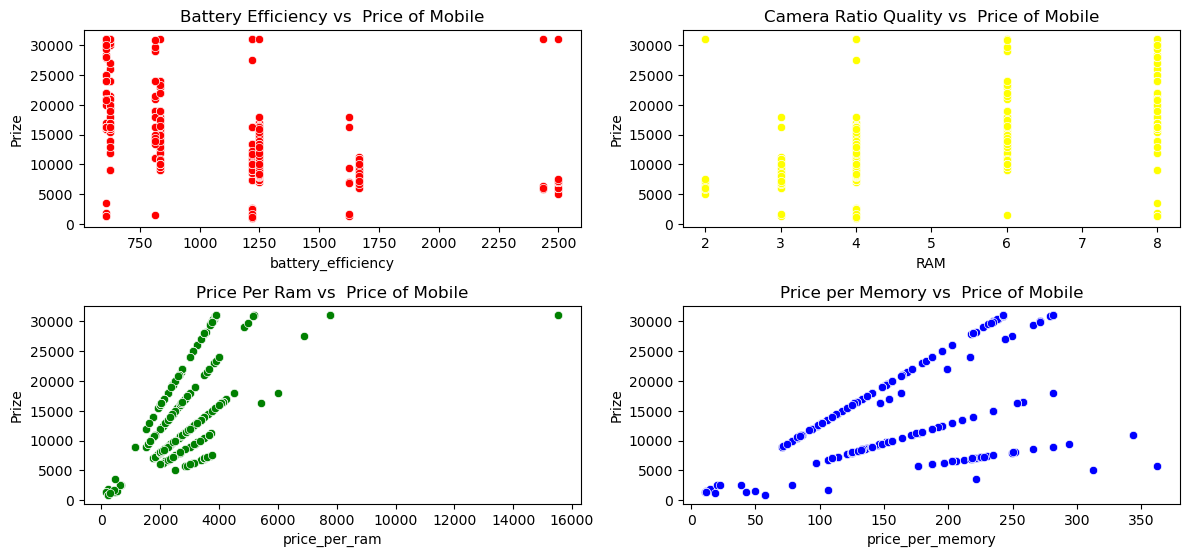

In [2080]:
# Creating scatter plots
plt.figure(figsize=(12, 8))

# Scatter plot: Battery efficiency vs Mobile Price
plt.subplot(3, 2, 1)  # 2x3 grid, 1st subplot
sns.scatterplot(x='battery_efficiency', y='Prize', data=df,color='red')
plt.title('Battery Efficiency vs  Price of Mobile')
plt.tight_layout()

# Scatter plot: RAM vs Mobile Price
plt.subplot(3, 2, 2)  # 2x3 grid, 1st subplot
sns.scatterplot(x='RAM', y='Prize', data=df,color='yellow')
plt.title('Camera Ratio Quality vs  Price of Mobile')
plt.tight_layout()

# Scatter plot: Price per RAM  vs Mobile Price
plt.subplot(3, 2, 3)  # 2x3 grid, 1st subplot
sns.scatterplot(x='price_per_ram', y='Prize', data=df,color='green')
plt.title('Price Per Ram vs  Price of Mobile')
plt.tight_layout()
# Scatter plot: Price per memory vs mobile Price
plt.subplot(3, 2, 4)  # 2x3 grid, 1st subplot
sns.scatterplot(x='price_per_memory', y='Prize', data=df,color='blue')
plt.title('Price per Memory vs  Price of Mobile')
plt.tight_layout()

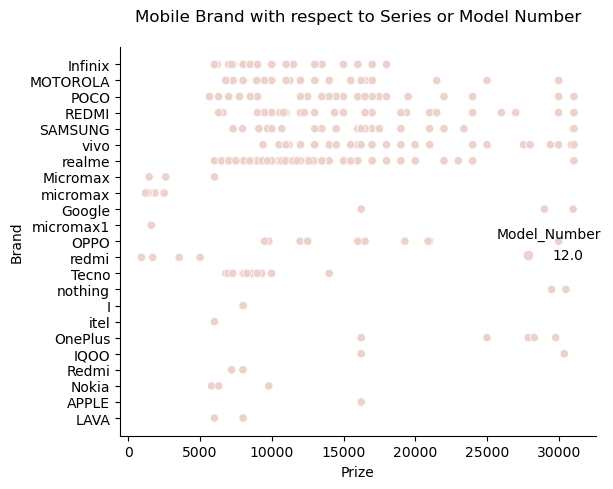

In [2081]:
##size impact
sns.relplot(data = df,y='Brand',x='Prize',hue = 'Model_Number')
plt.title('Mobile Brand with respect to Series or Model Number\n')
plt.tight_layout()
plt.show()

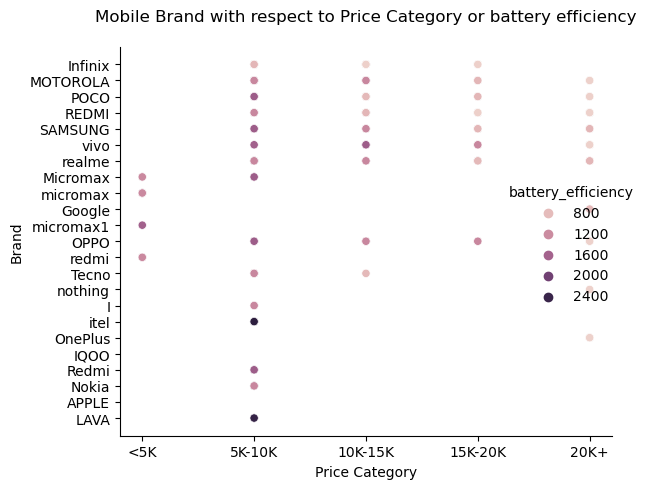

In [2082]:
##size impact
sns.relplot(data = df,y='Brand',x='Price Category',hue = 'battery_efficiency')
plt.title('Mobile Brand with respect to Price Category or battery efficiency\n')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

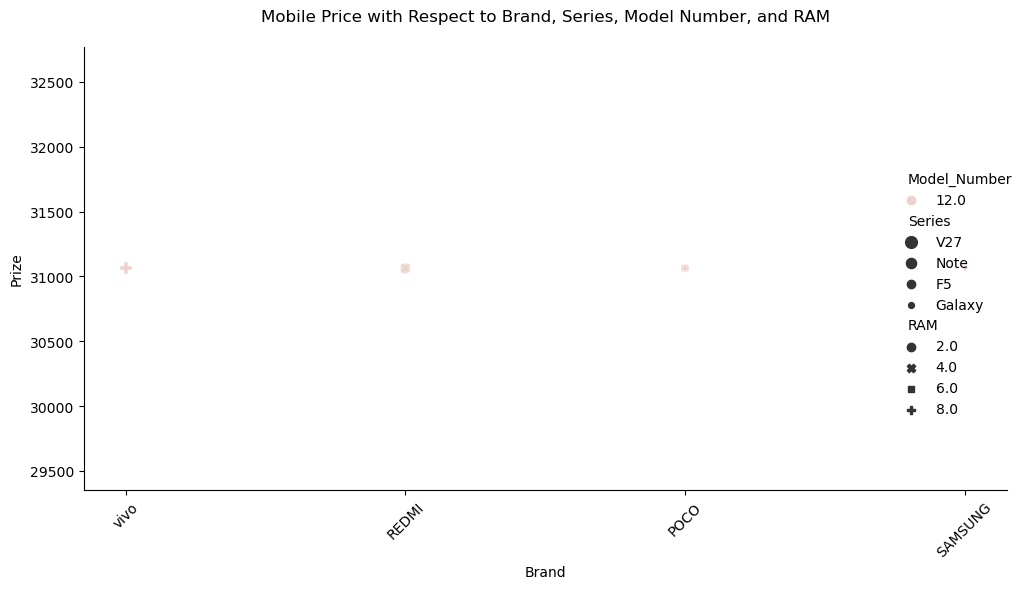

In [2083]:
## Size Impact:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 mobiles based on price
top_10 = df.nlargest(10, 'Prize')

# Scatter plot: Brand vs Price with Series size, Model_Number hue, and RAM style
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.relplot(
    data=top_10,
    x='Brand',
    y='Prize',
    kind='scatter',
    size='Series', 
    hue='Model_Number',
    style='RAM',
    height=6, aspect=1.5  # Adjust plot size
)

plt.title('Mobile Price with Respect to Brand, Series, Model Number, and RAM\n')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

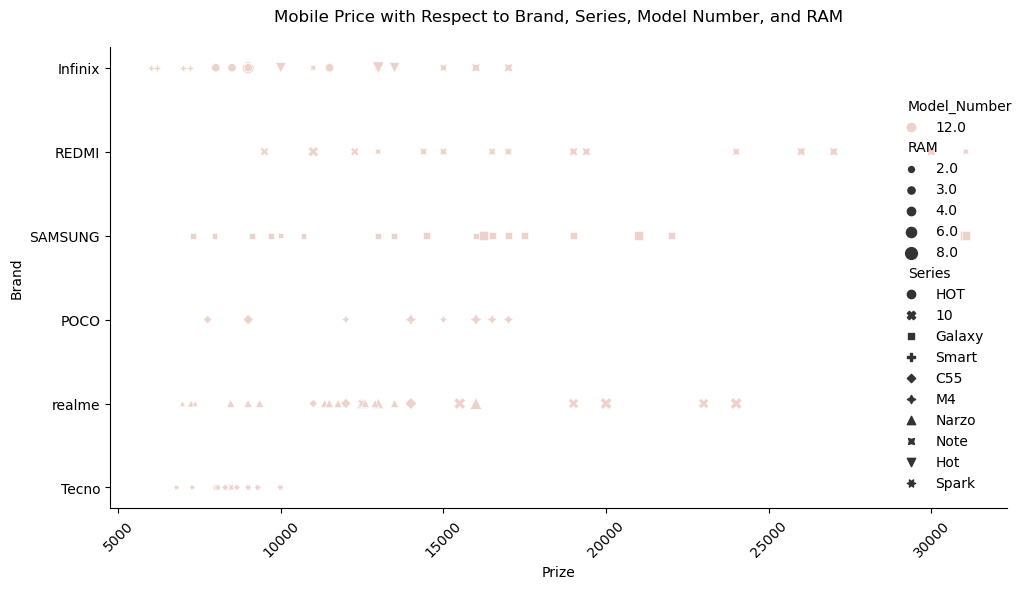

In [2084]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 most frequent Series
top_10_series = df['Series'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 Series
filtered_df = df[df['Series'].isin(top_10_series)]

# Scatter plot: Brand vs Price with RAM size, Model_Number hue, and Series style
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.relplot(
    data=filtered_df,
    x='Prize',
    y='Brand',
    kind='scatter',
    size='RAM', 
    hue='Model_Number',
    style='Series',
    height=6, aspect=1.5  # Adjust plot size
)

plt.title('Mobile Price with Respect to Brand, Series, Model Number, and RAM\n')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


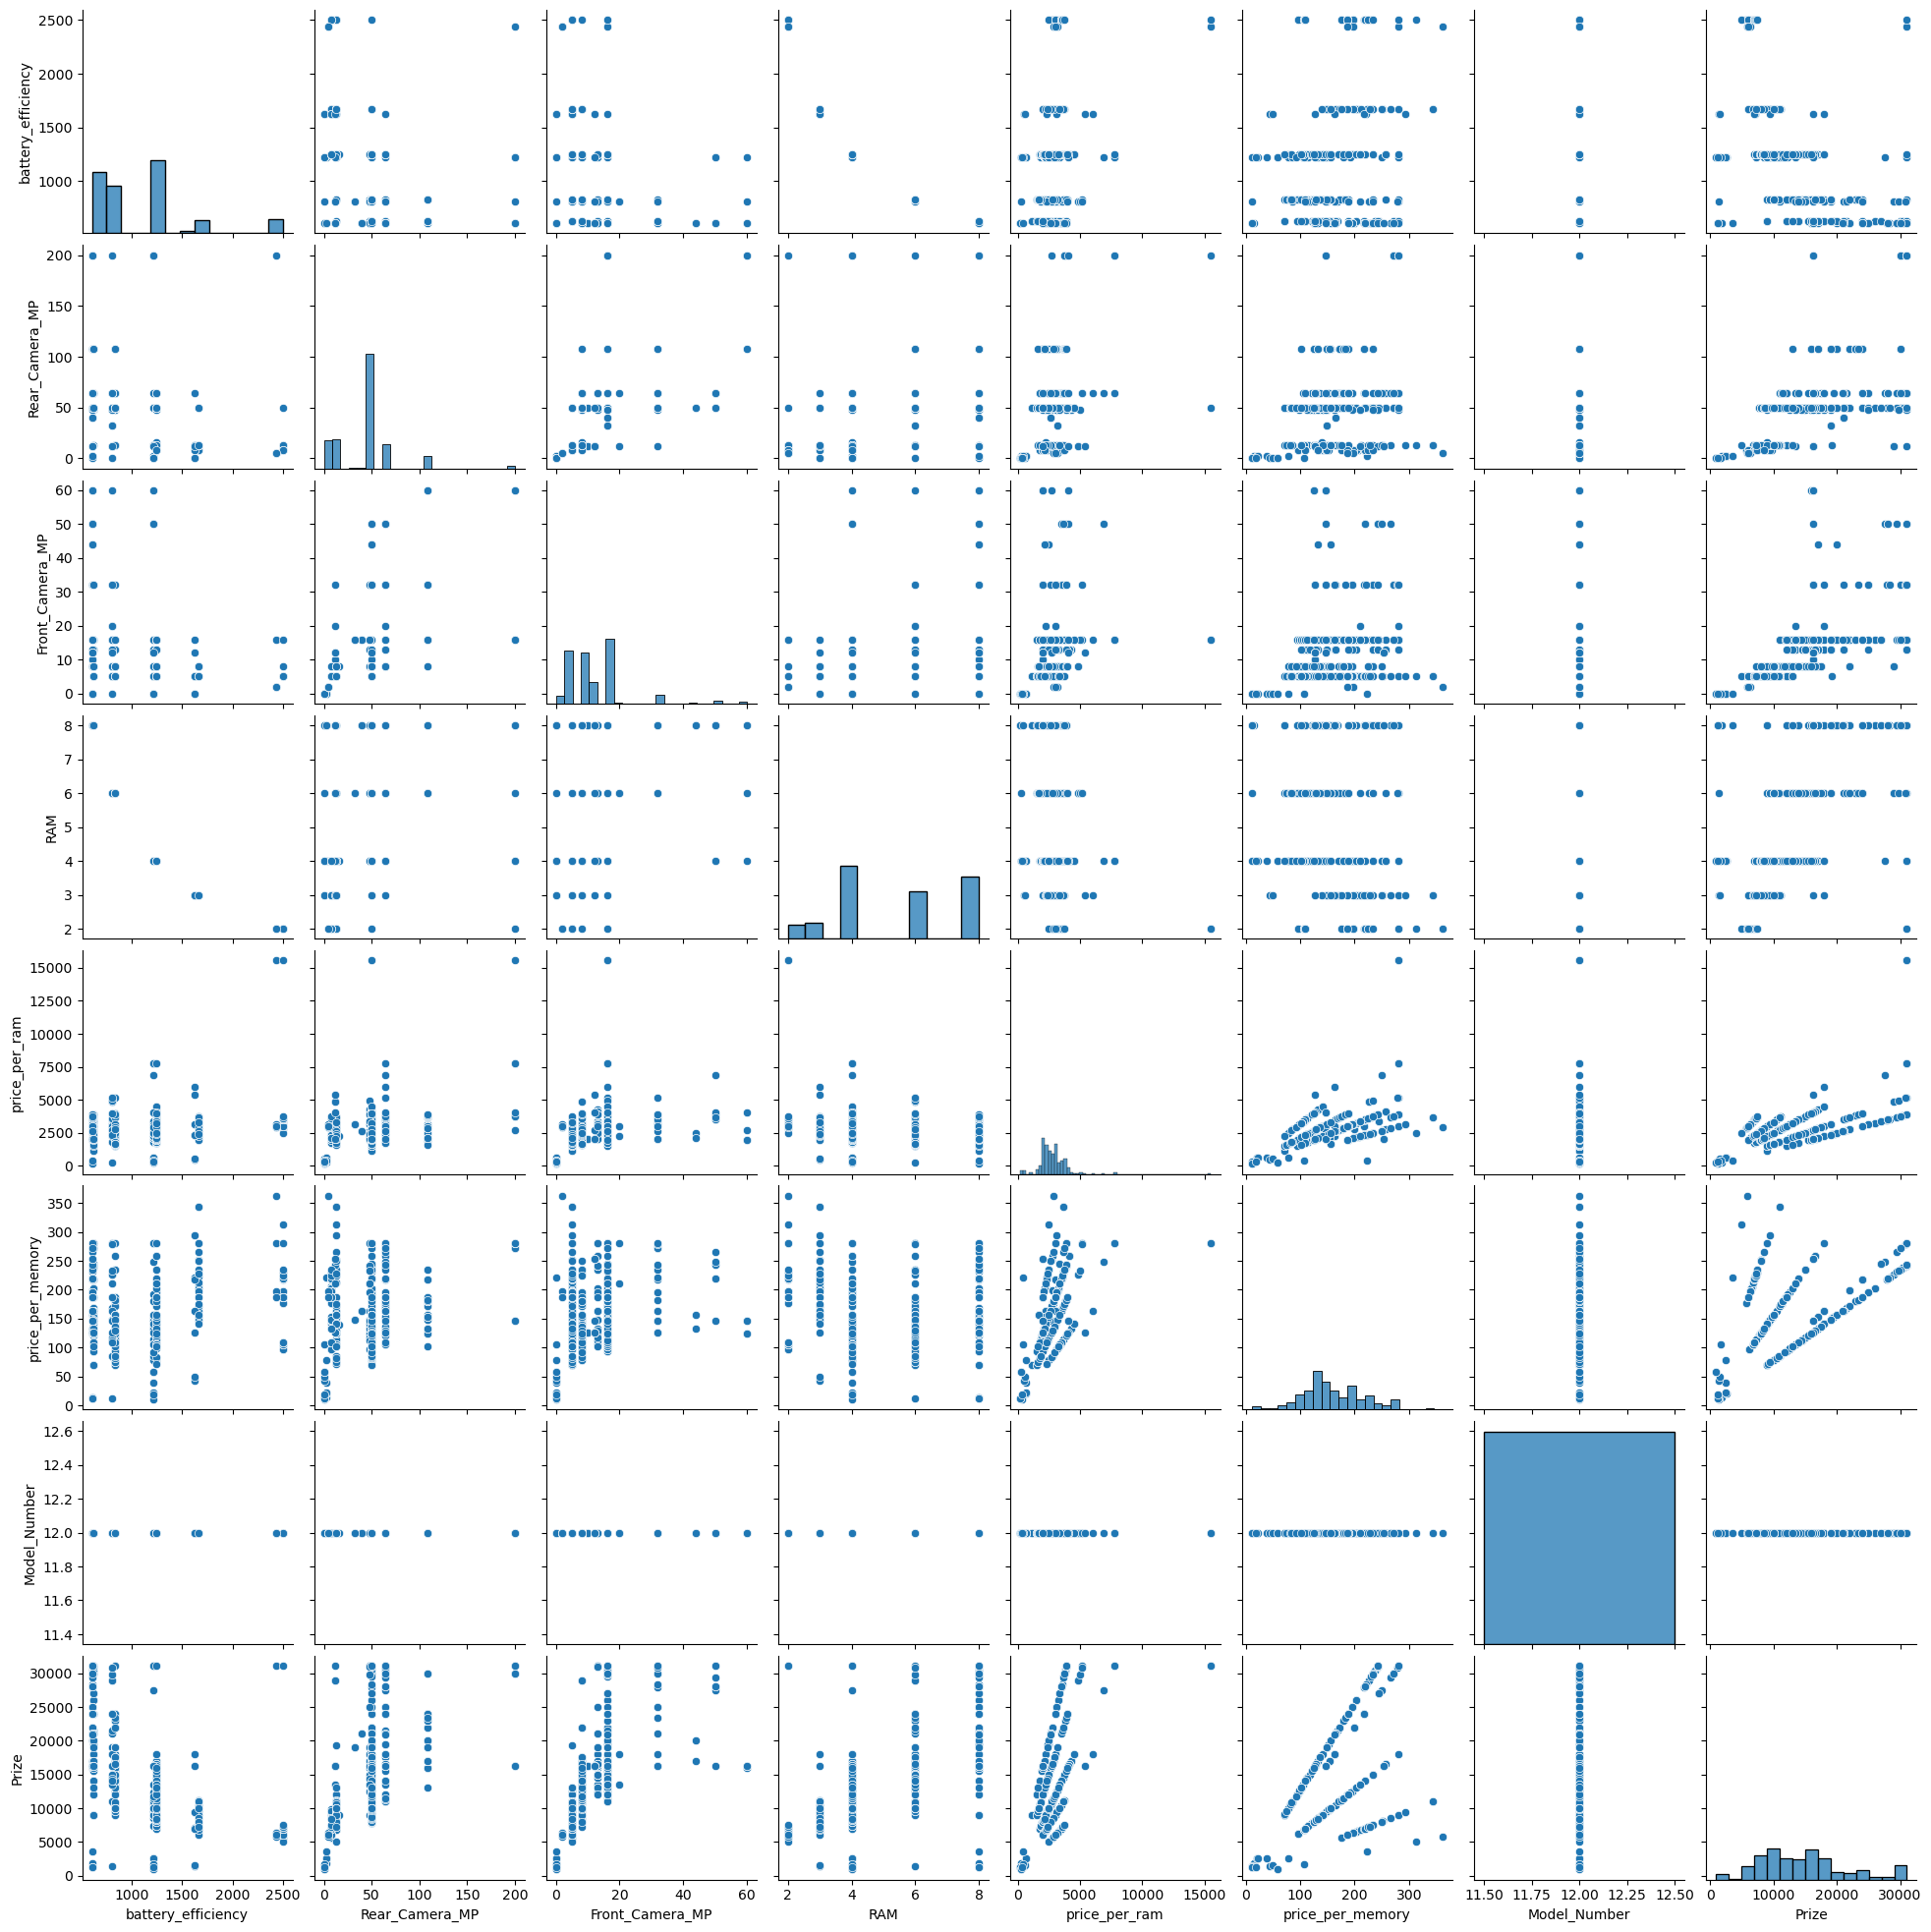

<Figure size 640x480 with 0 Axes>

In [2085]:
#Pair Plot for Created New Feature
sns.pairplot(df[['battery_efficiency', 'Rear_Camera_MP', 'Front_Camera_MP',
       'RAM', 'price_per_ram', 'price_per_memory', 'Brand',
       'Series', 'Model_Number','Prize']])
plt.show()
# Adding a title
plt.suptitle('Pairplot: Relationships Between New Features and Mobile Prices', y=1.02)
plt.show()

In [2086]:
#check for index
df.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize',
       'Price Category', 'battery_efficiency', 'Rear_Camera_MP',
       'Front_Camera_MP', 'price_per_ram', 'price_per_memory', 'Brand',
       'Series', 'Model_Number'],
      dtype='object')

<Axes: ylabel='Count'>

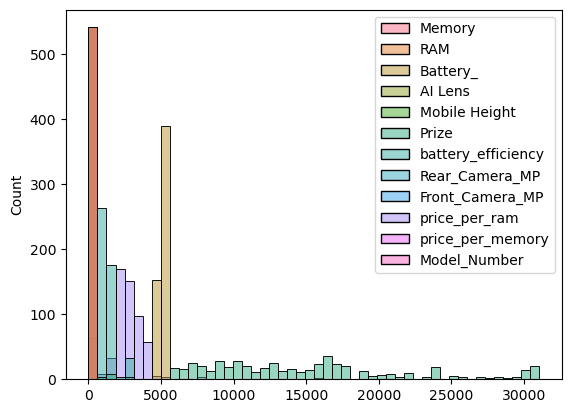

In [2087]:
##histplot showing all columns
sns.histplot(df,bins=50)

In [2088]:
#Drop the unnececory columns 
df=df.drop('Rear Camera',axis=1)
df=df.drop('Front Camera',axis=1)
df=df.drop('Model',axis=1)
print(df)

             Colour      Memory  RAM   Battery_  AI Lens  Mobile Height  \
0       Night Black   64.000000  4.0  4871.5878      0.0      16.760000   
1        Azure Blue   64.000000  4.0  4871.5878      0.0      16.760000   
2      Mineral Gray  128.000000  8.0  5000.0000      0.0      16.640000   
3        Royal Blue   32.000000  2.0  5000.0000      0.0      16.560000   
4          Marigold  128.000000  8.0  5000.0000      0.0      16.760000   
..              ...         ...  ...        ...      ...            ...   
536           Cream  110.550832  8.0  4871.5878      0.0      16.431201   
537            Cyan   32.000000  2.0  4871.5878      0.0      16.431201   
538  Turquoise Cyan   64.000000  4.0  5000.0000      0.0      16.760000   
539    Awesome Lime  128.000000  8.0  5000.0000      0.0      16.260000   
540        Sky Blue  128.000000  4.0  5000.0000      0.0      16.660000   

                      Processor_         Prize Price Category  \
0     Unisoc Spreadtrum SC9863A1  

In [2089]:
###Explore Categorical Variables
##2. Data Preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming you have a pandas DataFrame called df
# Let's create a sample dataframe for illustration purposes


df = pd.DataFrame(df)

# List of categorical columns to encode
categorical_columns = ['Colour','Processor_','Brand','Series']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Print the transformed DataFrame
print(df)

     Colour      Memory  RAM   Battery_  AI Lens  Mobile Height  Processor_  \
0       159   64.000000  4.0  4871.5878      0.0      16.760000         113   
1        20   64.000000  4.0  4871.5878      0.0      16.760000         113   
2       149  128.000000  8.0  5000.0000      0.0      16.640000          75   
3       201   32.000000  2.0  5000.0000      0.0      16.560000          56   
4       130  128.000000  8.0  5000.0000      0.0      16.760000          14   
..      ...         ...  ...        ...      ...            ...         ...   
536      49  110.550832  8.0  4871.5878      0.0      16.431201          89   
537      52   32.000000  2.0  4871.5878      0.0      16.431201          68   
538     259   64.000000  4.0  5000.0000      0.0      16.760000          35   
539      17  128.000000  8.0  5000.0000      0.0      16.260000          11   
540     215  128.000000  4.0  5000.0000      0.0      16.660000          57   

            Prize Price Category  battery_efficienc

                      Colour    Memory       RAM  Battery_  AI Lens  \
Colour              1.000000  0.083804  0.064503 -0.056670      NaN   
Memory              0.083804  1.000000  0.727123 -0.123574      NaN   
RAM                 0.064503  0.727123  1.000000 -0.171280      NaN   
Battery_           -0.056670 -0.123574 -0.171280  1.000000      NaN   
AI Lens                  NaN       NaN       NaN       NaN      NaN   
Mobile Height       0.031375  0.109225  0.079461  0.088601      NaN   
Processor_         -0.068677 -0.155173 -0.108733  0.054199      NaN   
Prize               0.058974  0.633637  0.666090 -0.178790      NaN   
battery_efficiency -0.087047 -0.722933 -0.905137  0.182136      NaN   
Rear_Camera_MP      0.053969  0.469595  0.439558 -0.064014      NaN   
Front_Camera_MP     0.035167  0.433164  0.493861 -0.282394      NaN   
price_per_ram       0.006137  0.111996 -0.165228 -0.025036      NaN   
price_per_memory   -0.026906 -0.302257  0.003967 -0.027023      NaN   
Brand 

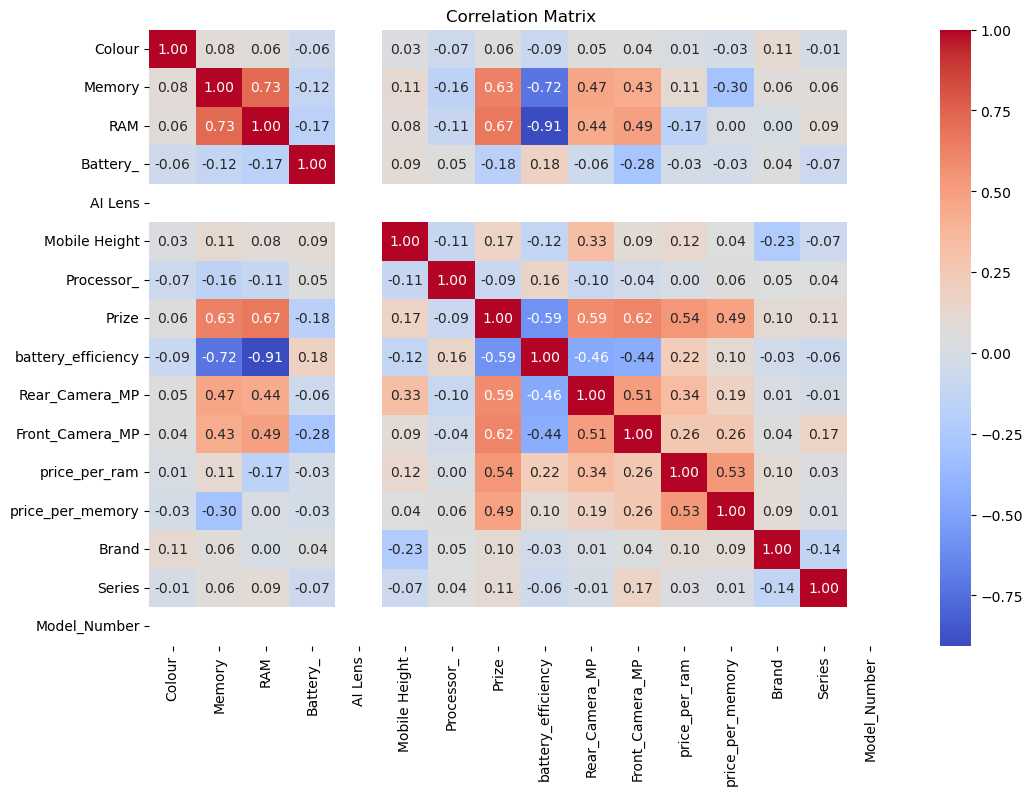

In [2090]:
# Heatmap for correlation
# Correlation matrix
##. Feature Extraction
##Step 3.1: Statistical Methods for Feature Importance
corr = df.corr()
print(corr)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [2091]:
##Feature Selection Techniques

In [2092]:
##df = df.dropna()  # Drop rows with missing values
##x = df.drop('Prize', axis=1)  # Drop 'SalePrice' to get features
##y = df['Prize']  # Get target variable
x=df[['Colour', 'Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height',
       'Processor_',  'battery_efficiency', 'Rear_Camera_MP',
       'Front_Camera_MP',  'price_per_ram',
       'price_per_memory', 'Brand', 'Series', 'Model_Number']]
      

In [2093]:
y=df['Prize']

In [2094]:
##5. Splitting the Dataset
##Model Building
##This splits the dataset into training and testing sets. The training set (80% of the data) will be used to 
#train the model, and the testing set (20% of the data) will be used to evaluate the model's performance.
##The random_state=42 ensures that the split is reproducible.
from sklearn.model_selection import train_test_split



In [2095]:
# Split data into training and testing sets (80% training, 20% testing)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5,test_size=0.2)

In [2096]:
#check the NAN Value
print("NaN values in x_train:", np.isnan(x_train).sum())
print("NaN values in x_test:", np.isnan(x_test).sum())

print("Infinite values in x_train:", np.isinf(x_train).sum())
print("Infinite values in x_test:", np.isinf(x_test).sum())


NaN values in x_train: Colour                0
Memory                0
RAM                   0
Battery_              0
AI Lens               0
Mobile Height         0
Processor_            0
battery_efficiency    0
Rear_Camera_MP        0
Front_Camera_MP       0
price_per_ram         0
price_per_memory      0
Brand                 0
Series                0
Model_Number          0
dtype: int64
NaN values in x_test: Colour                0
Memory                0
RAM                   0
Battery_              0
AI Lens               0
Mobile Height         0
Processor_            0
battery_efficiency    0
Rear_Camera_MP        0
Front_Camera_MP       0
price_per_ram         0
price_per_memory      0
Brand                 0
Series                0
Model_Number          0
dtype: int64
Infinite values in x_train: Colour                0
Memory                0
RAM                   0
Battery_              0
AI Lens               0
Mobile Height         0
Processor_            0
battery_effic

In [2097]:
###Build the Model
##We will start by implementing Linear Regression as a baseline model. For better performance, you can explore Decision Trees, Random Forests,
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [2098]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [2099]:
y_pred = model.predict(x_test)

In [2100]:
score = model.score(x_test, y_test)
print(f'Model Score: {score}')

Model Score: 0.9924652742711686


In [2101]:
from sklearn.metrics import mean_squared_error, r2_score

In [2102]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('Mean Absolute Error:', mae)

Mean Squared Error: 392025.1111550907
R-squared: 0.9924652742711686
Mean Absolute Error: 279.53606081161337


In [2103]:
##overfitting and underfitting
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_model.fit(x_train, y_train)

# Predictions
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# Calculate Performance Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R² Score: {train_r2:.3f}")
print(f"Test R² Score: {test_r2:.3f}")
print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")


Train R² Score: 0.999
Test R² Score: 0.993
Train MSE: 64274.230
Test MSE: 388278.558


In [2104]:
##Overfitting: Train R² very high, Test R² much lower.
###Underfitting: Both Train R² and Test R² low (below 0.6).
###Good Fit: Train & Test R² are close and relatively high (>0.7).

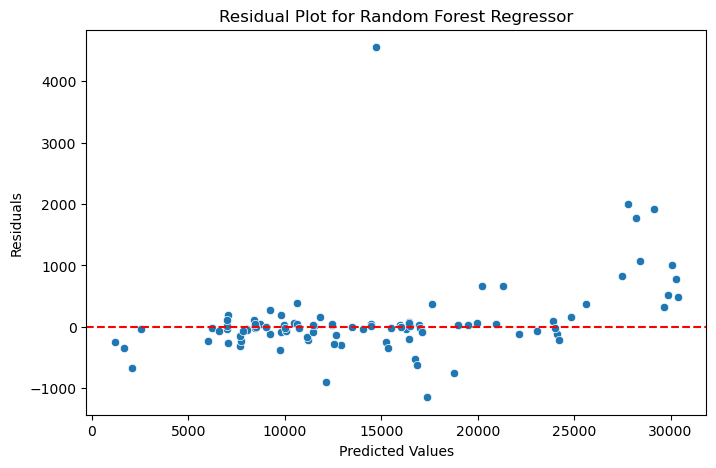

In [2105]:
##Residual Plot Analysis
###Residuals should be randomly distributed around zero.

import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest Regressor")
plt.show()


In [2106]:
##Overfitting: If residuals show a pattern, model is too complex.
###Underfitting: If residuals are widely spread, model is too simple.
###Good Fit: Residuals randomly scattered around zero.

In [2107]:
###Creating Linear-Regression Model
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train,y_train)
y_train_pred = model2.predict(x_test)

score = model2.score(x_test, y_test)
print(f'Model Score: {score}')


Model Score: 0.6625507934944468


In [2108]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('Mean Absolute Error:', mae)

Mean Squared Error: 392025.1111550907
R-squared: 0.9924652742711686
Mean Absolute Error: 279.53606081161337


In [2109]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # Increase alpha for more regularization
ridge_model.fit(x_train, y_train)

y_train_pred = ridge_model.predict(x_train)
y_test_pred = ridge_model.predict(x_test)


In [2110]:
####Check the overfitting Or UnderFitting
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

# Train the model
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

# Predictions
y_train_pred = lr_model.predict(x_train)
y_test_pred = lr_model.predict(x_test)

# Calculate performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R² Score: {train_r2:.3f}")
print(f"Test R² Score: {test_r2:.3f}")
print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")


Train R² Score: 0.959
Test R² Score: 0.663
Train MSE: 1975963.216
Test MSE: 17557183.559


In [2111]:
##Overfitting: Train R² very high, Test R² much lower.
###Underfitting: Both Train R² and Test R² low (below 0.6).
###Good Fit: Train & Test R² are close and relatively high (>0.7).

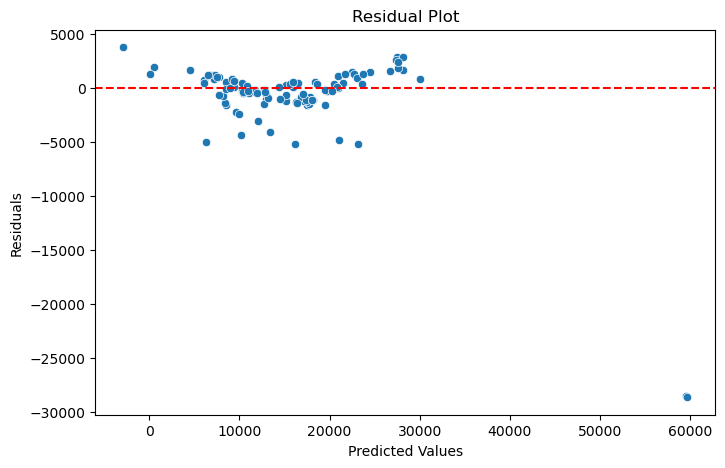

In [2112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [2113]:
##Overfitting: If residuals show a pattern, model is too complex.
###Underfitting: If residuals are widely spread, model is too simple.
###Good Fit: Residuals randomly scattered around zero.

In [2114]:
####Lasso Regression

In [2115]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [2116]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [2117]:
feature_sel_model.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False])

In [2118]:
lasso = Lasso(alpha=0.01)  # Example alpha value, adjust based on your needs
lasso.fit(x_train, y_train)

# Use SelectFromModel for feature selection
feature_sel_model = SelectFromModel(lasso, threshold="mean", max_features=10)
x_train_selected = feature_sel_model.transform(x_train)

# List selected features
selected_feat = x_train.columns[feature_sel_model.get_support()]

# Print some stats
print('Total features: {}'.format(x_train.shape[1]))  # Total features in the data
print('Selected features: {}'.format(len(selected_feat)))  # Number of selected features

# Now print how many coefficients are zero
print('Features with coefficients shrank to zero: {}'.format(np.sum(lasso.coef_ == 0))) 

Total features: 15
Selected features: 2
Features with coefficients shrank to zero: 2


In [2119]:
model3 = Lasso()

# Train the model
model3.fit(x_train, y_train)

# Predicting values using the trained model
model3_pred = model3.predict(x_test)

# Displaying the predicted values
print('Predicted values (model3_pred):', model3_pred)

Predicted values (model3_pred): [ 8553.89958366  6770.85730007 27492.87008134 28123.65966884
 17517.07763504  9360.69730327  7738.12062444 15762.5788142
 20529.32175647 11019.9200808   9190.50730135 11139.13617795
 12693.58731833 12961.51194581 24471.07795913  7847.74093086
  9574.63455525 20908.96864103   509.29490282 27404.11079001
 18426.69978016 59541.86859131  9057.51057443 23172.44844047
 12697.10211118  8572.92426591 17815.76592191 21556.21250533
 28149.48992179 12845.13867369 20963.20842516 22471.40934153
  7441.75525866 11680.12377928  8371.80282588 22718.16470799
 26737.26084355 15939.40356266  9190.50730135 17665.28695228
 16485.38236489 15194.74856786 17170.05398712 17178.16467304
 10256.88783891  8217.97607884 15155.4736219  12055.8735585
 10823.30431209 18635.60457184  7149.6652209  13001.91371459
 14372.98795594 21007.66955174   122.69200453  7277.63305437
 17532.55938446 59652.85729762 17010.47544719  7740.11205945
  9438.24070673  8539.71740448 17181.91238649 11731.280

In [2120]:
# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, model3_pred)
print('Mean Squared Error:', mse)

# Calculate and print the R-squared score
r2 = r2_score(y_test, model3_pred)
print('R-squared:', r2)

mae = mean_absolute_error(y_test, model3_pred)
print('Mean Absolute Error:', mae)

Mean Squared Error: 17529159.789959516
R-squared: 0.6630894105608613
Mean Absolute Error: 1666.9484956797878


In [2121]:
##checking overfitting and underfitting
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Train Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha value for tuning
lasso_model.fit(x_train, y_train)

# Predictions
y_train_pred = lasso_model.predict(x_train)
y_test_pred = lasso_model.predict(x_test)

# Calculate performance metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R² Score: {train_r2:.3f}")
print(f"Test R² Score: {test_r2:.3f}")
print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")


Train R² Score: 0.959
Test R² Score: 0.663
Train MSE: 1975963.465
Test MSE: 17554377.877


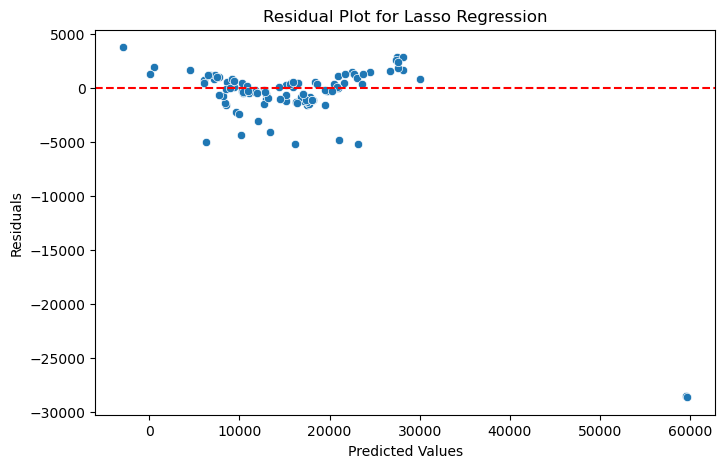

In [2122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Lasso Regression")
plt.show()


In [2123]:
##Overfitting: Large gap between training and validation scores.
##Underfitting: Both training and validation scores low and close.
##Good Fit: Training and validation scores converge at a high score.

In [2124]:
##Creating Decision Tree Regressor Model:


from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=4, ccp_alpha=0.0)
model4.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=10)

In [2125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = model4.predict(x_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (if needed)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print all the metrics
print(f'Model Score: {model4.score(x_test, y_test)}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Model Score: 0.9510213478770762
Mean Squared Error: 2548315.922004188
R-squared: 0.9510213478770762
Mean Absolute Error: 939.166436188525


In [2126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Decision Tree Model
tree_model = DecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples_leaf=2, random_state=42)
tree_model.fit(x_train, y_train)

# Predictions
y_train_pred = tree_model.predict(x_train)
y_test_pred = tree_model.predict(x_test)

# Calculate Performance Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R² Score: {train_r2:.3f}")
print(f"Test R² Score: {test_r2:.3f}")
print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")


Train R² Score: 0.995
Test R² Score: 0.982
Train MSE: 241458.472
Test MSE: 924425.662


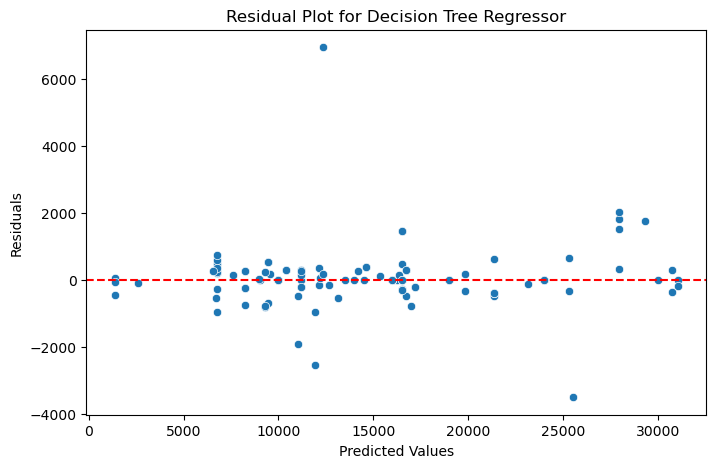

In [2127]:
##Check Residual Plots
##Residuals should be randomly distributed around zero.

import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Decision Tree Regressor")
plt.show()


In [2128]:
## Interpretation:

##Overfitting: Large gap between training and validation curves.
##Underfitting: Both training and validation curves low and close.
##Good Fit: Training and validation curves converge at a high score.

In [2129]:
##SVM MOdel
from sklearn.svm import SVR

model5= SVR()

# Train SVM Regressor
model5 = SVR(kernel='linear', C=1, epsilon=0.2)
model5.fit(x_train, y_train)

SVR(C=1, epsilon=0.2, kernel='linear')

In [2130]:
# Predicting
model5_pred = model5.predict(x_test)

# Evaluating model performance

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, model5_pred)
print('Mean Squared Error:', mse)

# Calculate and print the R-squared score
r2 = r2_score(y_test, model5_pred)
print('R-squared:', r2)

mae = mean_absolute_error(y_test, model5_pred)
print('Mean Absolute Error:', mae)

Mean Squared Error: 8187409.26446796
R-squared: 0.8426379293517904
Mean Absolute Error: 1458.903093409803


In [2131]:
##check overfiting and underfitting
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Train SVR Model
svr_model = SVR(kernel='linear', C=2, epsilon=0.1)  # Adjust hyperparameters
svr_model.fit(x_train, y_train)

# Predictions
y_train_pred = svr_model.predict(x_train)
y_test_pred = svr_model.predict(x_test)

# Calculate Performance Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R² Score: {train_r2:.3f}")
print(f"Test R² Score: {test_r2:.3f}")
print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")


Train R² Score: 0.917
Test R² Score: 0.834
Train MSE: 4028332.377
Test MSE: 8636321.724


In [2132]:
## Interpretation:

##Overfitting: Train R² high (~1.0), Test R² low (~0.5).
##Underfitting: Both Train and Test R² low (< 0.6).
##Good Fit: Train & Test R² close and relatively high (>0.7).

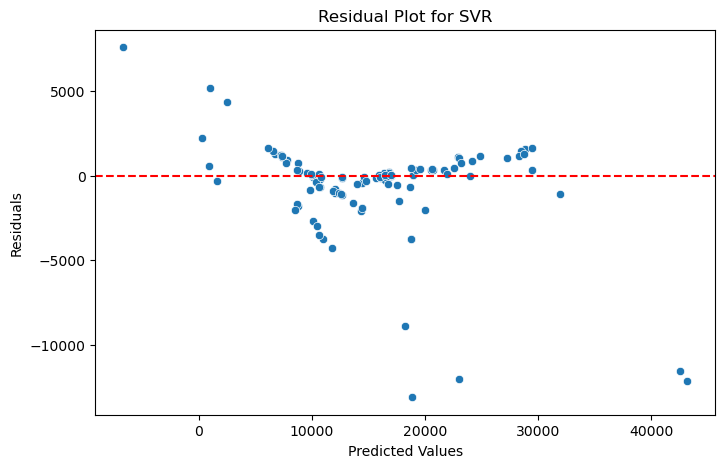

In [2133]:
##Check Residual Plots
##Residuals should be randomly distributed around zero.
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for SVR")
plt.show()


In [2134]:
## Interpretation:

##Overfitting: If residuals show a pattern, the model is too complex.
##Underfitting: If residuals are widely spread, the model is too simple.
##Good Fit: Residuals randomly scattered around zero.

In [2135]:
##Gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor

# Train Model
model6 = GradientBoostingRegressor(n_estimators=350,learning_rate=0.02,max_depth=4,min_samples_split=15,min_samples_leaf=5,subsample=0.75,random_state=42)
model6.fit(x_train, y_train)

# Predict
model6_pred = model6.predict(x_test)


In [2136]:
# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, model6_pred)
print('Mean Squared Error:', mse)

# Calculate and print the R-squared score
r2 = r2_score(y_test, model6_pred)
print('R-squared:', r2)

mae = mean_absolute_error(y_test, model6_pred)
print('Mean Absolute Error:', mae)

Mean Squared Error: 513864.4142266018
R-squared: 0.9901235219050233
Mean Absolute Error: 406.830014344914


In [2137]:
##Check overfitting and underfitting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Gradient Boosting Model
gbr_model = GradientBoostingRegressor(n_estimators=350, learning_rate=0.02, max_depth=4, 
                                      min_samples_split=15, min_samples_leaf=5, subsample=0.75, random_state=42)
gbr_model.fit(x_train, y_train)

# Predictions
y_train_pred = gbr_model.predict(x_train)
y_test_pred = gbr_model.predict(x_test)

# Calculate Performance Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R² Score: {train_r2:.3f}")
print(f"Test R² Score: {test_r2:.3f}")
print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")


Train R² Score: 0.998
Test R² Score: 0.990
Train MSE: 75013.830
Test MSE: 513864.414


In [2138]:
## Interpretation:

##Overfitting: Train R² very high (~1.0), Test R² low (~0.5).
##Underfitting: Both Train and Test R² low (< 0.6).
##Good Fit: Train & Test R² close and relatively high (>0.7).

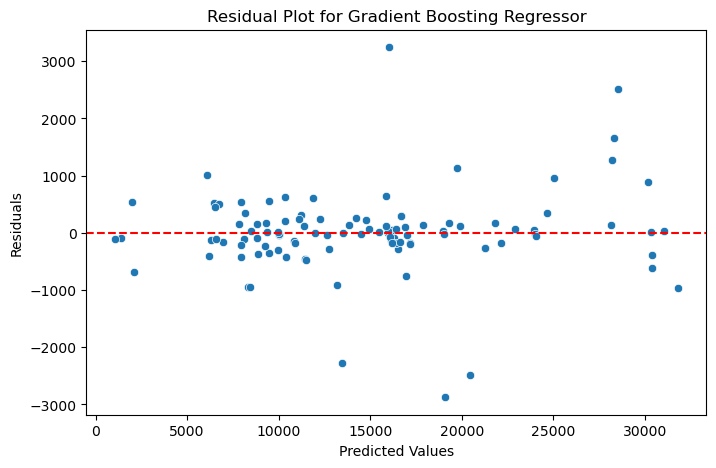

In [2139]:
## Check Residual Plots
###Residuals should be randomly distributed around zero.
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Gradient Boosting Regressor")
plt.show()


In [2140]:
##Interpretation:

##Overfitting: Large gap between training and validation curves.
##Underfitting: Both training and validation curves low and close.
##Good Fit: Training and validation curves converge at a high score.

In [2141]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define and train the KNN model
model7 = KNeighborsRegressor(n_neighbors=3, weights='distance', p=2)  # You can tune 'n_neighbors' for better performance
model7.fit(x_train, y_train)

# Predict on test data
model7_pred = model7.predict(x_test)

In [2142]:
# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, model7_pred)
print('Mean Squared Error:', mse)

# Calculate and print the R-squared score
r2 = r2_score(y_test, model7_pred)
print('R-squared:', r2)

mae = mean_absolute_error(y_test, model7_pred)
print('Mean Absolute Error:', mae)

Mean Squared Error: 2091854.3310391873
R-squared: 0.9597945432561514
Mean Absolute Error: 309.0004507216823


In [2143]:
###Check overfitting and underfitting
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train KNN Model
knn_model = KNeighborsRegressor(n_neighbors=10, weights='distance', p=2)    # Change hyperparameters to tune
knn_model.fit(x_train, y_train)

# Predictions
y_train_pred = knn_model.predict(x_train)
y_test_pred = knn_model.predict(x_test)

# Calculate Performance Metrics
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train R² Score: {train_r2:.3f}")
print(f"Test R² Score: {test_r2:.3f}")
print(f"Train MSE: {train_mse:.3f}")
print(f"Test MSE: {test_mse:.3f}")


Train R² Score: 1.000
Test R² Score: 0.967
Train MSE: 0.000
Test MSE: 1729746.092


In [2144]:
## Interpretation:

##Overfitting: Train R² very high (~1.0), Test R² low (~0.5).
##Underfitting: Both Train and Test R² low (< 0.6).
##Good Fit: Train & Test R² close and relatively high (>0.7).

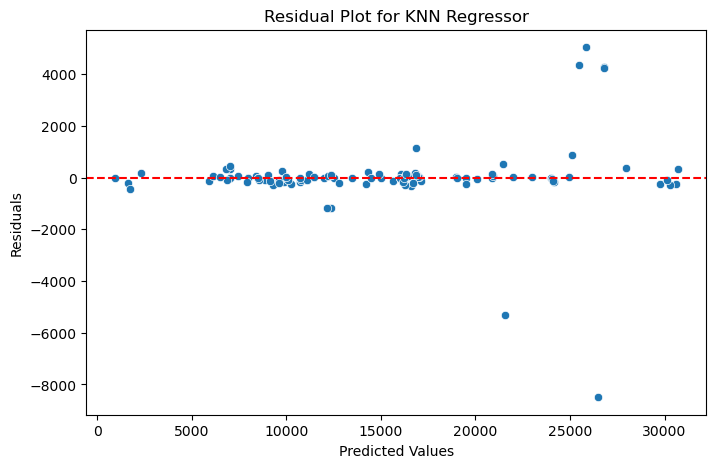

In [2145]:
 ##Check Residual Plots
##Residuals should be randomly distributed around zero.
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_test - y_test_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for KNN Regressor")
plt.show()


In [2146]:
##Interpretation:

##Overfitting: If residuals show a pattern, the model is too complex.
##Underfitting: If residuals are widely spread, the model is too simple.
##Good Fit: Residuals randomly scattered around zero.

In [2290]:
###comparision the best model 
models = ['Random Forest','Linear Regression', 'Lasso','Decision Tree','SVR','GradientBoostingRegressor','KNeighborsRegressor']
mae_values = [392025.1111550907 , 392025.1111550907,17529159.789959516,2548315.922004188,8187409.26446796,513864.4142266018,2091854.3310391873]
rmse_values = [0.9924652742711686, 0.9924652742711686,0.6630894105608613,0.9510213478770762,0.8426379293517904,0.9901235219050233,0.9597945432561514]
mse_values=[279.53606081161337,279.53606081161337,1666.9484956797878,939.166436188525,1458.903093409803,406.830014344914,309.0004507216823]
model_comparison = pd.DataFrame({'Model': models,'MAE': mae_values,'RMSE': rmse_values,'MSE':mse_values})
print(model_comparison)
best_model = model_comparison.loc[model_comparison['MAE'].idxmin()] #idxmin() finds the index of the minimum MAE value.
print("  ")
print("  ")
print("Best Model based on MAE and RMSE:")
print(best_model)

                       Model           MAE      RMSE          MSE
0              Random Forest  3.920251e+05  0.992465   279.536061
1          Linear Regression  3.920251e+05  0.992465   279.536061
2                      Lasso  1.752916e+07  0.663089  1666.948496
3              Decision Tree  2.548316e+06  0.951021   939.166436
4                        SVR  8.187409e+06  0.842638  1458.903093
5  GradientBoostingRegressor  5.138644e+05  0.990124   406.830014
6        KNeighborsRegressor  2.091854e+06  0.959795   309.000451
  
  
Best Model based on MAE and RMSE:
Model    Random Forest
MAE      392025.111155
RMSE          0.992465
MSE         279.536061
Name: 0, dtype: object


In [2148]:
##check top 2 dataset
df.head(2)

Colour  Memory  RAM   Battery_  AI Lens  Mobile Height  Processor_   Prize  \
0     159    64.0  4.0  4871.5878      0.0          16.76         113  7299.0   
1      20    64.0  4.0  4871.5878      0.0          16.76         113  7299.0   

  Price Category  battery_efficiency  Rear_Camera_MP  Front_Camera_MP  \
0         5K-10K          1217.89695              13                5   
1         5K-10K          1217.89695              13                5   

   price_per_ram  price_per_memory  Brand  Series  Model_Number  
0        1824.75        114.046875      4      62          12.0  
1        1824.75        114.046875      4      62          12.0

In [2292]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [2294]:
# Example new data for prediction (e.g., model, Colour, ram, RearCamera,Front Camera,AI Leanse Mobile Height,Processor,etc)
new_data= [[159,128,16,5000,0.0,16.76,75,1217.89695,50,16,1824.75,114.046875,12,66,12.0]]
# Predict the property price for the new data
predicted_price = model.predict(new_data)

# Output the predicted price
print(f'Predicted Mobile Price: {predicted_price[0]:,.2f}')

Predicted Mobile Price: 13,380.24


In [2296]:
# Predict prices on test dataset
y_pred_test = model.predict(x_test)

# Compare actual vs predicted prices
results = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_pred_test})
print(results.head(10))  # Show first few rows


     Actual Price  Predicted Price
281   6978.000000       7011.63000
40    7999.000000       8026.71000
404  30385.000000      29922.42500
457  29790.000000      27783.37000
223  15999.000000      15999.00000
298   9999.000000       9927.00000
203   8749.000000       8700.96000
489  16228.375231      16852.99512
531  20890.000000      20227.30000
463  10548.000000      10562.76000


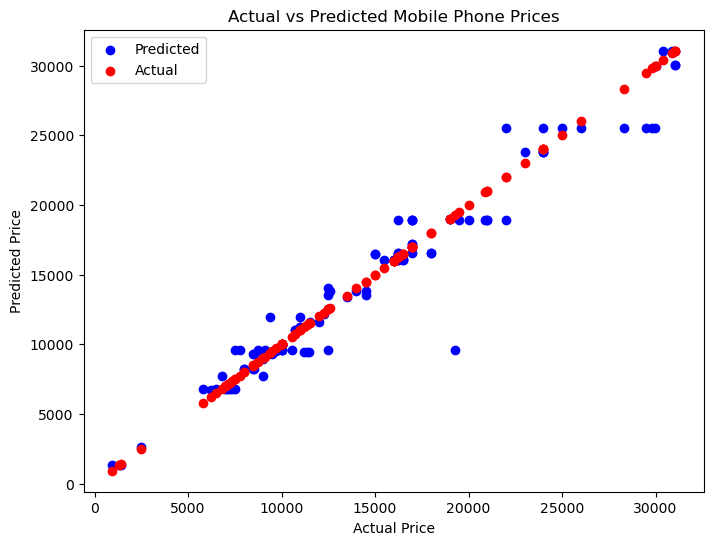

In [2153]:
##Model Evaluation
##Step 5.1: Evaluating Model Performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.title('Actual vs Predicted Mobile Phone Prices')
plt.show()

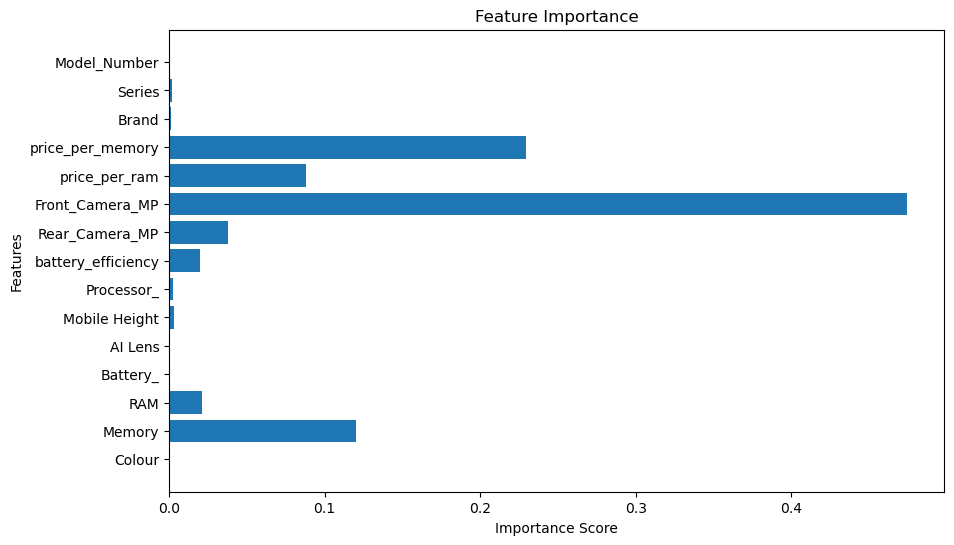

In [2154]:
##Feature Importance Analysis
# Visualize feature importance
importance = model.feature_importances_
feature_names = x.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [2155]:
# to save final data
df.to_csv('D:\project\project\EDA\Mobiledataset.csv')